# Approved Building Permits Dataset

The Approved Building Permits (ABP) dataset contains information on building permits issued across Boston from 2010 to 2024. It provide insights into city maintenance and development patterns. More information can be found via the following link: https://data.boston.gov/dataset/approved-building-permits. 

To begin, we will perform the following steps: 
- Clean and pre-process the dataset
- Conduct base analysis on the dataset 
- Gather useful insights on permits in District 7 from 2014 to 2024, which is the timeframe we were advised to focus on based on the client

Then, we will gather the following key insights: 
- The distribution of permits by work types over time 
- The distribution of permits by occupancy types over time 
- The distribution of permits by permit status over time 
- The number and declared valuation of permits by neighborhoods

## Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

We load the ABP dataset from our GitHub repository to make sure the notebook is reproducible for others. 

In [2]:
df = pd.read_csv("../data/d7-approved-building-permit-new.csv", low_memory=False)

In [3]:
df

,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,city,state,zip,property_id,parcel_id,gpsy,gpsx,y_latitude,x_longitude,is_d7
0,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-01-28 16:29:26+00,2021-07-28 04:00:00+00,...,Boston,MA,02109,130392.0,3.038070e+08,2.956235e+06,777000.467910,42.359190,-71.052924,False
1,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$29.00,2011-11-04 15:04:58+00,2012-05-04 04:00:00+00,...,West Roxbury,MA,02132,17268.0,2.012032e+09,2.920239e+06,751016.119617,42.260750,-71.149611,False
2,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,"$5,000.00",$70.00,2020-06-01 18:08:47+00,NaN,...,Charlestown,MA,02129,113443.0,2.028370e+08,2.962078e+06,775710.380595,42.375243,-71.057585,False
3,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13 18:38:56+00,2020-05-13 04:00:00+00,...,Roxbury,MA,02118,129994.0,4.025580e+08,2.949423e+06,769648.312667,42.340600,-71.080251,True
4,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,"$15,000.00",$182.00,2013-01-03 19:13:09+00,2013-07-03 04:00:00+00,...,Brighton,MA,02135,149852.0,2.204944e+09,2.950791e+06,749690.298777,42.344600,-71.154051,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666227,U49993435,OSEAT,Use of Premises,Outside Seating,Outdoor patio / amenity space for commercial o...,Christine McMahon,$0.00,$50.00,2019-09-25 15:36:11+00,2020-03-25 04:00:00+00,...,Boston,MA,02114,154961.0,3.027170e+08,2.956658e+06,774864.862273,42.360383,-71.060818,False
666228,U49993492,TEMTRL,Use of Premises,Temporary Trailers,Temporary Construction Trailer at Herb Chamber...,Regina Olivieri,"$1,000.00",$53.00,2019-09-12 17:07:00+00,2020-03-12 04:00:00+00,...,Allston,MA,02134,424193.0,2.101574e+09,2.952823e+06,756414.438216,42.350100,-71.129145,False
666229,U4999352,DRIVE,Use of Premises,Driveway Installation,Owners would like to install a curb cut and a ...,Maria Dubrowski,"$2,700.00",$53.00,2012-05-30 18:28:59+00,2012-11-30 05:00:00+00,...,Jamaica Plain,MA,02130,24047.0,1.901861e+09,2.939398e+06,759722.466377,42.313220,-71.117131,False
666230,U49996367,RESPAR,Use of Premises,Residential Parking,2 car parking,Cesar DaSilva,"$7,000.00",$53.00,2023-04-10 15:10:24+00,2023-10-10 04:00:00+00,...,Dorchester,MA,02124,34863.0,1.701519e+09,2.931227e+06,771088.017082,42.290650,-71.075261,False


## Data Cleaning 

We clean the ABP dataset to make it easier for visualization in the notebook and on Looker Studio. 

We noticed that the variables worktype, permittypedescr, description, and comments are describing the each permit's work type in repetitive ways. Since the permittypedescr, description, and comments are too detailed for analysis, we decide to focus on using worktype. But worktype has 65 distinct types, so we group them into 9 major categories to form a better understanding. 

In [4]:
df['worktype'].unique()

array(['INTEXT', 'COB', 'OTHER', 'EXTREN', 'INTREN', 'VIOL', 'ADDITION',
       'EXTDEM', 'FA', 'SPRINK', 'SIGNES', 'CELL', 'NEWCON', nan, 'ERECT',
       'SPRNK9', 'SITE', 'ROOF', 'FSTTRK', 'PLUMBING', 'CHGOCC', 'SOL',
       'SPCEVE', 'INTDEM', 'General', 'CANP', 'AWNING', 'TCOO', 'FENCE2',
       'INSUL', 'GEN', 'GARAGE', 'SD', 'LVOLT', 'SIDE', 'SIGNS', 'RESPAR',
       'ELECTRICAL', 'DRIVE', 'NROCC', 'MAINT', 'TEMTRL', 'INDBLR',
       'SPFT', 'RNWSIG', 'COMPAR', 'AWNRNW', 'AWNRET', 'CANPRN', 'RAZE',
       'TMPSER', 'HOLVEN', 'OSEAT', 'FENCE', 'TMPUSOC', 'FLAM', 'CONVRT',
       'Repair', 'SRVCHG', 'TVTRK', 'BFCHMDECMA', 'Service', 'Main',
       'TRENCH', 'GAS', 'New', 'INDFUR', 'BFCHMTENT', 'BFCHMFLOOR',
       'BFCHMINFIN', 'BFCHMTEMPE', 'Fencing', 'SpecEvent', 'BFCHMMATTR',
       'Dumpsters', 'Staging', 'SpeEvents'], dtype=object)

In [5]:
worktype_mapping = {
    'INTEXT': 'Renovation & Interior/Exterior Work',
    'INTREN': 'Renovation & Interior/Exterior Work',
    'EXTREN': 'Renovation & Interior/Exterior Work',
    'OTHER': 'Miscellaneous',
    'SPRINK': 'Fire Protection & Safety',
    'ADDITION': 'Renovation & Interior/Exterior Work',
    'COB': 'Miscellaneous',
    'FA': 'Fire Protection & Safety',
    'ERECT': 'Construction & New Installations',
    'SITE': 'Temporary Structures & Events',
    'VIOL': 'Miscellaneous',
    'PLUMBING': 'Electrical, Plumbing & Utility Systems',
    'SPCEVE': 'Temporary Structures & Events',
    'NEWCON': 'Construction & New Installations',
    'SIGNES': 'Signage & Canopy',
    'SPRNK9': 'Fire Protection & Safety',
    'EXTDEM': 'Demolition',
    'SD': 'Miscellaneous',
    'ROOF': 'Renovation & Interior/Exterior Work',
    'GARAGE': 'Construction & New Installations',
    'AWNING': 'Signage & Canopy',
    'FENCE2': 'Renovation & Interior/Exterior Work',
    'INSUL': 'Renovation & Interior/Exterior Work',
    'SIGNS': 'Signage & Canopy',
    'FSTTRK': 'Temporary Structures & Events',
    'CHGOCC': 'Occupancy & Use Change',
    'CELL': 'Temporary Structures & Events',
    'NROCC': 'Miscellaneous',
    'SOL': 'Construction & New Installations',
    'INTDEM': 'Demolition',
    'SPFT': 'Miscellaneous',
    'RAZE': 'Demolition',
    'TMPSER': 'Temporary Structures & Events',
    'ELECTRICAL': 'Electrical, Plumbing & Utility Systems',
    'GEN': 'Electrical, Plumbing & Utility Systems',
    'CANP': 'Signage & Canopy',
    'FENCE': 'Renovation & Interior/Exterior Work',
    'SIDE': 'Renovation & Interior/Exterior Work',
    'HOLVEN': 'Miscellaneous',
    'CONVRT': 'Miscellaneous',
    'SRVCHG': 'Electrical, Plumbing & Utility Systems',
    'LVOLT': 'Electrical, Plumbing & Utility Systems',
    'MAINT': 'Miscellaneous',
    'Service': 'Miscellaneous',
    'DRIVE': 'Construction & New Installations',
    'INDBLR': 'Electrical, Plumbing & Utility Systems',
    'TEMTRL': 'Temporary Structures & Events',
    'FLAM': 'Fire Protection & Safety',
    'COMPAR': 'Miscellaneous',
    'TVTRK': 'Temporary Structures & Events',
    'New': 'Construction & New Installations',
    'GAS': 'Electrical, Plumbing & Utility Systems',
    'INDFUR': 'Electrical, Plumbing & Utility Systems',
    'AWNRNW': 'Signage & Canopy',
    'RNWSIG': 'Signage & Canopy',
    'RESPAR': 'Miscellaneous',
    'AWNRET': 'Signage & Canopy',
    'BFCHMINFIN': 'Miscellaneous',
    'BFCHMTENT': 'Temporary Structures & Events',
    'General': 'Miscellaneous',
    'Dumpsters': 'Miscellaneous',
    'TMPUSOC': 'Occupancy & Use Change',
    'OSEAT': 'Temporary Structures & Events',
    'CANPRN': 'Signage & Canopy',
    'TCOO': 'Temporary Structures & Events'
}

df['worktype_group'] = df['worktype'].map(worktype_mapping)

df = df.dropna(subset=['worktype_group'])

We transform the variables declared_valuation and total_fees into numerical values without dollar ($) and comma (,) signs. We also explore each work type's total declared value and total fees. 

In [6]:
df['declared_valuation'] = df['declared_valuation'].replace({r'\$': '', ',': ''}, regex=True).astype(float)
df['total_fees'] = df['total_fees'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

df.loc[:, 'declared_valuation'] = df['declared_valuation']
df.loc[:, 'total_fees'] = df['total_fees']

value_by_worktype_df = df.groupby('worktype_group', as_index=False)[['declared_valuation', 'total_fees']].sum()

value_by_worktype_df['declared_valuation'] = value_by_worktype_df['declared_valuation'].apply(lambda x: f"${x:,.2f}")
value_by_worktype_df['total_fees'] = value_by_worktype_df['total_fees'].apply(lambda x: f"${x:,.2f}")

value_by_worktype_df

/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_9938/3745804002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['declared_valuation'] = df['declared_valuation'].replace({r'\$': '', ',': ''}, regex=True).astype(float)
/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_9938/3745804002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_fees'] = df['total_fees'].replace({r'\$': '', ',': ''}, regex=True).astype(float)


,worktype_group,declared_valuation,total_fees
0,Construction & New Installations,"$85,347,198,595.03","$405,278,004.41"
1,Demolition,"$907,490,888.92","$8,223,113.77"
2,"Electrical, Plumbing & Utility Systems","$20,125,912,787.24","$49,909,448.71"
3,Fire Protection & Safety,"$946,168,047.52","$10,629,635.12"
4,Miscellaneous,"$12,168,629,014.68","$24,678,870.93"
5,Occupancy & Use Change,"$10,532,113,405.59","$58,478,401.16"
6,Renovation & Interior/Exterior Work,"$38,829,953,439.84","$272,958,222.18"
7,Signage & Canopy,"$89,888,689.16","$1,204,245.83"
8,Temporary Structures & Events,"$15,932,988,719.91","$99,302,730.99"


For the variables issued_date and expiration_date, we only keep year and month and remove date and time for analysis. We also make a new column named issued_year to only display the year. These adjustments will make sure the data is processed properly on LookerStudio. Based on client's request to focus on the past 10 years, we filter the dataset based on this timeframe.

In [7]:
df['issued_date'] = pd.to_datetime(df['issued_date'], errors='coerce').dt.to_period('M')
df['expiration_date'] = pd.to_datetime(df['expiration_date'], errors='coerce').dt.to_period('M')

df = df.dropna(subset=['issued_date', 'expiration_date'])

df['issued_year'] = df['issued_date'].dt.year

df = df[(df['issued_year'] >= 2014) & (df['issued_year'] <= 2024)]

/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_9938/299692800.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['issued_date'] = pd.to_datetime(df['issued_date'], errors='coerce').dt.to_period('M')
/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_9938/299692800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issued_date'] = pd.to_datetime(df['issued_date'], errors='coerce').dt.to_period('M')
/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_9938/299692800.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['expiration_date'] = pd.to_datetime(df['expiration_date'], errors='coerce').dt.to_period('M')
/var/fo

In [8]:
value_by_year_df = df.groupby(['issued_year'])[['declared_valuation', 'total_fees']].sum().reset_index()

value_by_year_df['declared_valuation'] = value_by_year_df['declared_valuation'].apply(lambda x: f"${x:,.2f}")
value_by_year_df['total_fees'] = value_by_year_df['total_fees'].apply(lambda x: f"${x:,.2f}")

value_by_year_df

,issued_year,declared_valuation,total_fees
0,2014,"$3,843,949,683.29","$33,746,787.73"
1,2015,"$5,862,212,033.44","$46,243,940.18"
2,2016,"$4,933,554,887.51","$40,460,202.97"
3,2017,"$5,489,137,055.26","$47,159,155.26"
4,2018,"$5,675,483,725.16","$45,941,195.21"
5,2019,"$5,864,305,727.68","$48,487,076.00"
6,2020,"$5,188,556,648.59","$47,086,296.02"
7,2021,"$5,324,627,187.36","$48,554,869.43"
8,2022,"$10,973,484,802.17","$58,016,583.35"
9,2023,"$9,660,371,750.06","$75,343,000.13"


The variable status has 4 values: Open, Closed, Stop Work, and Issued. Since Stop Work and Issued only have 2 values in total, they are dropped. 

In [9]:
df['status'].value_counts()

status
Open         290592
Closed       185004
Stop Work         1
Issued            1
Name: count, dtype: int64

In [10]:
df = df[~df['status'].isin(['Stop Work', 'Issued'])]

In [11]:
df['status'].value_counts()

status
Open      290592
Closed    185004
Name: count, dtype: int64

The variable occupancytype has 12 distinct types. We group them into 6 major categories and give them names that are more intuitive to understand. 

In [12]:
df['occupancytype'].unique()


array(['Mixed', 'Multi', 'Comm', '1-2FAM', '1-3FAM', 'Other', '1-4FAM',
       'VacLd', nan, '7More', '1Unit', 'COMM', '1-7FAM'], dtype=object)

In [13]:
df['occupancytype'] = df['occupancytype'].str.strip().str.upper()

occupancytype_map = {
    'Mixed Use': ['MIXED'],
    'Multi-Family Residential': ['MULTI', '1-7FAM'],
    'Commercial': ['COMM'],
    '1-2 Family Residential': ['1-2FAM'],
    '1-3 Family Residential': ['1-3FAM'],
    '1-4 Family Residential': ['1-4FAM'],
    'Vacant Land': ['VACLD'],
    'Single Unit Residential': ['1UNIT'],
    'Multi-Unit Residential': ['7MORE'],
    'Other': ['OTHER'],
}

reverse_map = {val: key for key, vals in occupancytype_map.items() for val in vals}

df['occupancytype_group'] = df['occupancytype'].map(reverse_map)
df['occupancytype_group'] = df['occupancytype_group'].fillna('Unknown')

def group_occupancytype(value):
    for category, types in occupancytype_map.items():
        if value in types:
            return category
    return None

df['occupancytype_group'] = df['occupancytype'].apply(group_occupancytype)

df = df.dropna(subset=['occupancytype_group'])

In [14]:
value_by_occupancy_df = df.groupby(['occupancytype_group'])[['declared_valuation', 'total_fees']].sum().reset_index()

value_by_occupancy_df['declared_valuation'] = value_by_occupancy_df['declared_valuation'].apply(lambda x: f"${x:,.2f}")
value_by_occupancy_df['total_fees'] = value_by_occupancy_df['total_fees'].apply(lambda x: f"${x:,.2f}")

value_by_occupancy_df

,occupancytype_group,declared_valuation,total_fees
0,1-2 Family Residential,"$3,411,081,803.76","$35,951,829.29"
1,1-3 Family Residential,"$1,297,849,313.77","$13,698,949.64"
2,1-4 Family Residential,"$509,919,675.94","$4,606,803.23"
3,Commercial,"$35,522,838,853.41","$285,863,143.61"
4,Mixed Use,"$11,369,746,230.95","$100,340,290.93"
5,Multi-Family Residential,"$10,189,017,731.03","$50,339,280.79"
6,Multi-Unit Residential,"$84,600.00",$946.00
7,Other,"$4,200,079,317.36","$29,981,681.91"
8,Single Unit Residential,"$7,998.00",$350.00
9,Vacant Land,"$2,061,296,479.80","$17,483,166.93"


The variable city contains messy values, meaning the naming method is inconsistent and sometimes repetitive. Therefore, we group them based on the location names and adjust the naming formats.

In [15]:
df['city'].unique()

array(['Boston', 'Roxbury', 'Allston', 'Jamaica Plain', 'Charlestown',
       'East Boston', 'Dorchester', 'Hyde Park', 'South Boston',
       'Brighton', 'West Roxbury', 'Roslindale', 'Mission Hill',
       'Mattapan', 'NorthEnd/', 'Chestnut Hill', 'BOSTON', 'HYDE PARK',
       'West End', 'South End', 'Boston/West End', 'Boston/Roxbury',
       'BOSTON/', 'Charlestown/', "Boston's Historic North End", nan,
       'Dorchester Center', 'Downtown/Financial District',
       'Boston/Downtown', 'BRIGHTON', 'ALLSTON', 'Financial District',
       'ROXBURY', 'DORCHESTER', 'Dorchester/', 'BOSTON/Waterfront',
       'Boston/Back Bay', 'MATTAPAN', 'Boston/Fenway/Kenmore/Audubo',
       'Hyde Park/', 'Theater District', 'Fenway', 'Allston/Boston',
       'SOUTH BOSTON', 'ROSLINDALE', 'South End/', 'East Boston/',
       'South Boston/South Boston', 'Brighton/Allston',
       'Charlestown/Boston', 'South Boston/', 'Boston/Beacon Hill',
       'Brighton/', 'Boston/North End', 'Roxbury/', 'roxbury

In [ ]:
def clean_city_name(city):
    if pd.isna(city) or city.strip() == '':
        return None

    # Standardize capitalization and remove unwanted characters
    city = city.strip().title().replace('/', '').replace("\\", "").replace("'", "").replace("-", "").replace("=", "").replace("+", "")

    city_mapping = {
        # Boston-related
        "Boston'S Historic North End": 'North End',
        'Boston/Waterfront': 'Waterfront',
        'Boston/North End': 'North End',
        'Boston/Beacon Hill': 'Beacon Hill',
        'Boston/Roslindale': 'Roslindale',
        'Boston/South End': 'South End',
        'Boston/South': 'South End',
        'Jamaica Plain/': 'Jamaica Plain',
        'Northend': 'North End',
        'Boston/Back Bay': 'Back Bay',
        'Boston/West End': 'West End',
        'Boston/Roxbury': 'Roxbury',
        'Boston/Downtown': 'Downtown',
        'Boston/Fenway/Kenmore/Audubo': 'Fenway/Kenmore',
        'BostonDowntown': 'Downtown',
        'Downtownfinancial District': 'Downtown',
        "Boston's Historic North End": 'North End',
        'Boston': 'Boston',
        'DowntownFinancial District': 'Boston',
        
        # Roxbury-related
        'Roxbury/': 'Roxbury',
        'Roxbury Crossin': 'Roxbury',
        'Ropxbury': 'Roxbury',
        'Roxbury': 'Roxbury',
        'Bostonroxbury': 'Roxbury', 
        'BostonRoxbury': 'Roxbury', 
        
        # Dorchester-related
        'Dorchester/': 'Dorchester',
        'Dorchester (Lower Mills)': 'Dorchester',
        'Dorchester (Savin Hill)': 'Dorchester',
        'Dorchester': 'Dorchester',
        'Dorchester Center': 'Dorchester',
        
        # East Boston-related
        'East Boston/': 'East Boston',
        'East Bostonboston': 'East Boston',
        'E Boston': 'East Boston',
        'East Boston': 'East Boston',
        
        # South Boston-related
        'South Boston/': 'South Boston',
        'South Boston/South Boston': 'South Boston',
        'South Boston': 'South Boston',
        'South': 'South Boston',
        'South BostonSouth Boston': 'South Boston', 
        
        # Brighton-Allston-related
        'Brighton/Allston': 'Allston/Brighton',
        'Allston/Brighton': 'Allston/Brighton',
        'Brighton / Allston': 'Allston/Brighton',
        'Allstonboston': 'Allston/Brighton',
        'Brightonallston': 'Allston/Brighton',
        'Brighton Allston': 'Allston/Brighton',
        'Allstonbrighton': 'Allston/Brighton',
        'Brighton#': 'Allston/Brighton',
        
        # Hyde Park-related
        'Hyde Park/': 'Hyde Park',
        'Hyde Park': 'Hyde Park',
        'Hyde Parkboston': 'Hyde Park',
        'Hyde PArk': 'Hyde Park',
        
        # Other corrections
        'West End': 'West End',
        'BostonWest End': 'West End',
        'Theater District': 'Downtown',
        'Financial District': 'Downtown',
        'Financial District/': 'Downtown',
        'Northend': 'North End',
        'Kenmore/Fenway': 'Fenway/Kenmore',
        'Fenwaykenmoreaudubo': 'Fenway/Kenmore',
        'Kenmorefenway': 'Fenway/Kenmore',
        'Mission Hill': 'Mission Hill',
        "Mission Hill'": 'Mission Hill',
        'Jamaica Plain.': 'Jamaica Plain',
        'Jamaica Plainboston': 'Jamaica Plain',
        'Back Bayboston': 'Back Bay',
        'Mattapan': 'Mattapan',
        'Chestnut Hill': 'Chestnut Hill',
        'Roslindale': 'Roslindale',
        'Back Bay': 'Back Bay',
        'Charlestown': 'Charlestown',
        'Charlestownboston': 'Charlestown',
        'Charlestown\\=-0=]\\[=-': 'Charlestown',
        'Charlestown+': 'Charlestown',
        'Downtown': 'Downtown',
        'Downtownfinancial': 'Downtown',
        'Beacon Hill': 'Beacon Hill',
        'Chinatown': 'Chinatown',
        'Waterfront': 'Waterfront',
        'Back': 'Back Bay',
        'BostonS Historic North End': 'North End', 
        'BostonBeacon Hill': 'Beacon Hill', 
        'BostonChinatown': 'Chinatown', 
        'BostonWaterfront': 'Waterfront',
        'BostonBack Bay': 'Back Bay',
        'BostonFenwayKenmoreAudubo': 'Fenway/Kenmore',
        'AllstonBoston': 'Allston/Brighton',
        'BrightonAllston': 'Allston/Brighton',
        'BostonNorth End': 'North End',
        'BostonRoslindale': 'Roslindale',
        'KenmoreFenway': 'Fenway/Kenmore',
        'Dorchester(Lower Mills)': 'Dorchester',
        'Brighton Allston': 'Allston/Brighton',
        'Charlestown0][': 'Charlestown',
        'DowntownFinancial': 'Downtown',
        'East BostonBoston': 'East Boston', 
        'BostonSouth End': 'South End', 
        'BostonSouth': 'South End', 
        'AllstonBrighton': 'Allston/Brighton', 
        'CharlestownBoston': 'Charlestown', 
        'BostonFenway': 'Fenway', 
        'Brighton Allston': 'Allston/Brighton', 
        'BostonCharlestown': 'Charlestown', 
    }

    city = city_mapping.get(city, city)

    if city is not None:
        city = ' '.join(city.split())
    return city

df['city_name'] = df['city'].apply(clean_city_name)

df = df.dropna(subset=['city_name'])

print(df['city_name'].value_counts())

city_name
Boston              159543
Dorchester           70993
Roxbury              36049
Jamaica Plain        27261
South Boston         23623
Roslindale           23355
West Roxbury         22499
East Boston          22052
Brighton             20646
Hyde Park            18923
Mattapan             16732
Charlestown          16017
Allston               8941
Mission Hill          5771
Chestnut Hill         1587
Waterfront             219
West End               181
South End              172
Downtown               122
Fenway                  54
Beacon Hill             51
North End               37
Allston/Brighton        14
Chinatown               14
Fenway/Kenmore          12
Back Bay                 4
Name: count, dtype: int64


In [17]:
df['city_name'].unique()

array(['Boston', 'Roxbury', 'Allston', 'Jamaica Plain', 'Charlestown',
       'East Boston', 'Dorchester', 'Hyde Park', 'South Boston',
       'Brighton', 'West Roxbury', 'Roslindale', 'Mission Hill',
       'Mattapan', 'North End', 'Chestnut Hill', 'West End', 'South End',
       'Downtown', 'Waterfront', 'Back Bay', 'Fenway/Kenmore', 'Fenway',
       'Allston/Brighton', 'Beacon Hill', 'Chinatown'], dtype=object)

In [18]:
value_by_city_df = df.groupby(['city_name'])[['declared_valuation', 'total_fees']].sum().reset_index()

value_by_city_df['declared_valuation'] = value_by_city_df['declared_valuation'].apply(lambda x: f"${x:,.2f}")
value_by_city_df['total_fees'] = value_by_city_df['total_fees'].apply(lambda x: f"${x:,.2f}")

value_by_city_df

,city_name,declared_valuation,total_fees
0,Allston,"$3,288,454,353.20","$26,018,207.65"
1,Allston/Brighton,"$1,475,500.00","$15,630.50"
2,Back Bay,"$117,883,660.00","$1,210,080.00"
3,Beacon Hill,"$858,139.00","$6,706.05"
4,Boston,"$36,042,057,086.62","$310,917,566.58"
5,Brighton,"$3,219,182,126.72","$27,684,365.98"
6,Charlestown,"$1,821,915,608.09","$16,672,996.45"
7,Chestnut Hill,"$19,349,400.84","$219,639.31"
8,Chinatown,"$235,195.00","$2,241.00"
9,Dorchester,"$4,651,446,014.74","$32,391,743.51"


We previously turned the ABP dataset into shapefile, and we want to make the variable is_d7 easier to be processed for visualization. 

In [19]:
df['district_group'] = df['is_d7'].replace({True: 'District 7', False: 'Boston'})

We transform the variables latitude and longitude's formats to match LookerStudio's requirement for creating geographical graphs. 

In [20]:
df['Latitude, Longitude'] = df['y_latitude'].astype(str) + ', ' + df['x_longitude'].astype(str)

We ensure the zip codes begin with 0 in the front. When opneing the dataset as csv file, it oftens only have the last four digits of zip codes. 

In [21]:
df['zip'] = df['zip'].astype(str).str.zfill(5)

We drop the following variables that we no longer need or won't be using for analysis: worktype, permittypedescr, description, comments, applicant, address, city, state, sq_feet, occupancytype, property_id, parcel_id, gpsy, gpsx, y_latitude, x_longitude, is_d7

In [22]:
df.drop(columns=['worktype', 'permittypedescr', 'description', 'comments', 'applicant', 'address', 
                 'city', 'state', 'sq_feet', 'occupancytype', 'property_id', 'parcel_id', 'gpsy', 'gpsx', 'y_latitude', 
                 'x_longitude', 'is_d7'], inplace=True)

In [23]:
df

,permitnumber,declared_valuation,total_fees,issued_date,expiration_date,status,zip,worktype_group,issued_year,occupancytype_group,city_name,district_group,"Latitude, Longitude"
0,A1000569,36500.00,390.0,2021-01,2021-07,Open,02109,Renovation & Interior/Exterior Work,2021,Mixed Use,Boston,Boston,"42.35918951309634, -71.05292443230528"
3,A1001201,74295.75,803.0,2019-11,2020-05,Closed,02118,Renovation & Interior/Exterior Work,2019,Multi-Family Residential,Roxbury,District 7,"42.340599550568605, -71.08025053578007"
5,A1001913,1.00,33.0,2019-10,2020-04,Closed,02134,Renovation & Interior/Exterior Work,2019,Commercial,Allston,Boston,"42.35275961715376, -71.13185062470396"
6,A1002445,50000.00,556.0,2019-11,2020-05,Open,02134,Renovation & Interior/Exterior Work,2019,1-2 Family Residential,Allston,Boston,"42.359709604848376, -71.1243305919953"
7,A1002783,0.00,32.0,2019-10,2020-04,Open,02114,Renovation & Interior/Exterior Work,2019,Mixed Use,Boston,Boston,"42.365645195747256, -71.06165549022923"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
666226,U49993435,0.00,50.0,2019-09,2020-03,Open,02114,Temporary Structures & Events,2019,Mixed Use,Boston,Boston,"42.360382559159255, -71.06081781576749"
666227,U49993435,0.00,50.0,2019-09,2020-03,Open,02114,Temporary Structures & Events,2019,Mixed Use,Boston,Boston,"42.360382559159255, -71.06081781576749"
666228,U49993492,1000.00,53.0,2019-09,2020-03,Open,02134,Temporary Structures & Events,2019,Commercial,Allston,Boston,"42.35009994327356, -71.12914520619417"
666230,U49996367,7000.00,53.0,2023-04,2023-10,Open,02124,Miscellaneous,2023,1-3 Family Residential,Dorchester,Boston,"42.290649548614354, -71.07526063594952"


Now, we save the dataset as 3 versions: 
1. District 7 only 
2. The remaining areas in Boston only
3. Boston as a whole

In [24]:
df_d7 = df[df['district_group'] == 'District 7']
df_d7

,permitnumber,declared_valuation,total_fees,issued_date,expiration_date,status,zip,worktype_group,issued_year,occupancytype_group,city_name,district_group,"Latitude, Longitude"
3,A1001201,74295.75,803.0,2019-11,2020-05,Closed,02118,Renovation & Interior/Exterior Work,2019,Multi-Family Residential,Roxbury,District 7,"42.340599550568605, -71.08025053578007"
8,A1002830,0.00,26.0,2019-10,2020-04,Open,02119,Renovation & Interior/Exterior Work,2019,1-3 Family Residential,Roxbury,District 7,"42.327063565520376, -71.0899745876256"
10,A1003458,1.00,30.0,2021-02,2021-08,Open,02118,Renovation & Interior/Exterior Work,2021,1-2 Family Residential,Roxbury,District 7,"42.34259954437004, -71.07619052207372"
35,A1009433,0.00,29.0,2019-10,2020-04,Open,02119,Miscellaneous,2019,1-2 Family Residential,Roxbury,District 7,"42.32634031416893, -71.07739261235142"
36,A1009433,0.00,29.0,2019-10,2020-04,Open,02119,Miscellaneous,2019,1-2 Family Residential,Roxbury,District 7,"42.32634031416893, -71.07739261235142"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
666125,U49898417,3200.00,59.0,2019-04,2019-10,Open,02119,Miscellaneous,2019,1-4 Family Residential,Roxbury,District 7,"42.32291908005135, -71.07931138974524"
666126,U49898417,3200.00,59.0,2019-04,2019-10,Open,02119,Miscellaneous,2019,1-4 Family Residential,Roxbury,District 7,"42.32291908005135, -71.07931138974524"
666138,U49909001,1.00,50.0,2020-01,2020-07,Open,02120,Miscellaneous,2020,Other,Boston,District 7,"42.33840940875355, -71.08487454561904"
666177,U49935734,20000.00,50.0,2020-01,2020-07,Open,02121,Miscellaneous,2020,1-3 Family Residential,Dorchester,District 7,"42.31409955665593, -71.08278060090397"


In [25]:
df_d7.to_csv("../data/d7-ABP-cleaned.csv", index=False)

In [27]:
df_boston = df[df['district_group'] == 'Boston']
df_boston

,permitnumber,declared_valuation,total_fees,issued_date,expiration_date,status,zip,worktype_group,issued_year,occupancytype_group,city_name,district_group,"Latitude, Longitude"
0,A1000569,36500.0,390.0,2021-01,2021-07,Open,02109,Renovation & Interior/Exterior Work,2021,Mixed Use,Boston,Boston,"42.35918951309634, -71.05292443230528"
5,A1001913,1.0,33.0,2019-10,2020-04,Closed,02134,Renovation & Interior/Exterior Work,2019,Commercial,Allston,Boston,"42.35275961715376, -71.13185062470396"
6,A1002445,50000.0,556.0,2019-11,2020-05,Open,02134,Renovation & Interior/Exterior Work,2019,1-2 Family Residential,Allston,Boston,"42.359709604848376, -71.1243305919953"
7,A1002783,0.0,32.0,2019-10,2020-04,Open,02114,Renovation & Interior/Exterior Work,2019,Mixed Use,Boston,Boston,"42.365645195747256, -71.06165549022923"
9,A1003322,10000.0,120.0,2020-07,2021-01,Closed,02130,Renovation & Interior/Exterior Work,2020,1-2 Family Residential,Jamaica Plain,Boston,"42.31339959470808, -71.11082066540534"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
666226,U49993435,0.0,50.0,2019-09,2020-03,Open,02114,Temporary Structures & Events,2019,Mixed Use,Boston,Boston,"42.360382559159255, -71.06081781576749"
666227,U49993435,0.0,50.0,2019-09,2020-03,Open,02114,Temporary Structures & Events,2019,Mixed Use,Boston,Boston,"42.360382559159255, -71.06081781576749"
666228,U49993492,1000.0,53.0,2019-09,2020-03,Open,02134,Temporary Structures & Events,2019,Commercial,Allston,Boston,"42.35009994327356, -71.12914520619417"
666230,U49996367,7000.0,53.0,2023-04,2023-10,Open,02124,Miscellaneous,2023,1-3 Family Residential,Dorchester,Boston,"42.290649548614354, -71.07526063594952"


In [28]:
df_boston.to_csv("../data/boston-ABP-cleaned.csv", index=False)

In [29]:
df.to_csv("../data/all-ABP-cleaned.csv", index=False)

## Data Visualization

We use visualization to gain a better understanding on dataset. Our insights here will help us define key components for dashboard design on LookerStudio. 

#### Total Permit Count by Work Types in Boston (2014-2024)

<Figure size 2000x1000 with 0 Axes>

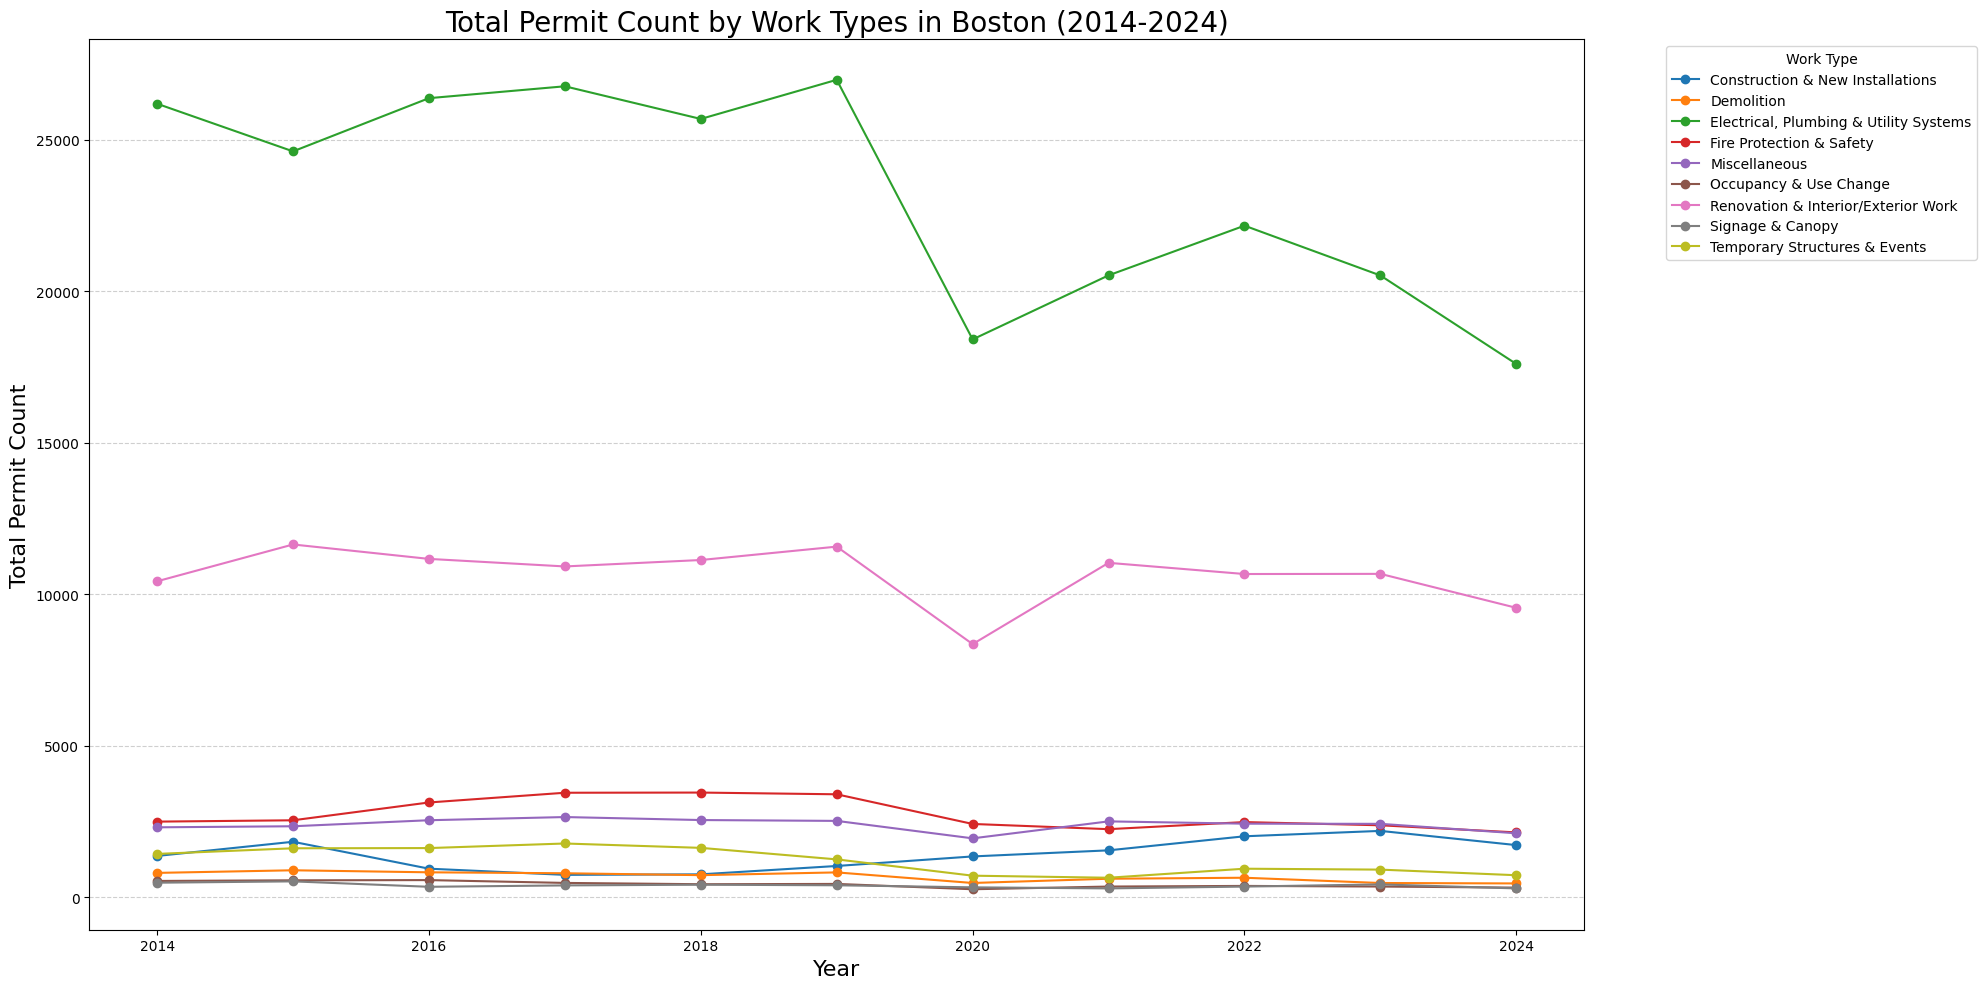

In [30]:
worktype_count = df.groupby(['issued_year', 'worktype_group']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
worktype_count.plot(kind='line', marker='o', linestyle='-', figsize=(20, 10))

plt.title('Total Permit Count by Work Types in Boston (2014-2024)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Permit Count', fontsize=16)
plt.legend(title='Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Total Permit Count by Work Types in District 7 (2014-2024)

<Figure size 2000x1000 with 0 Axes>

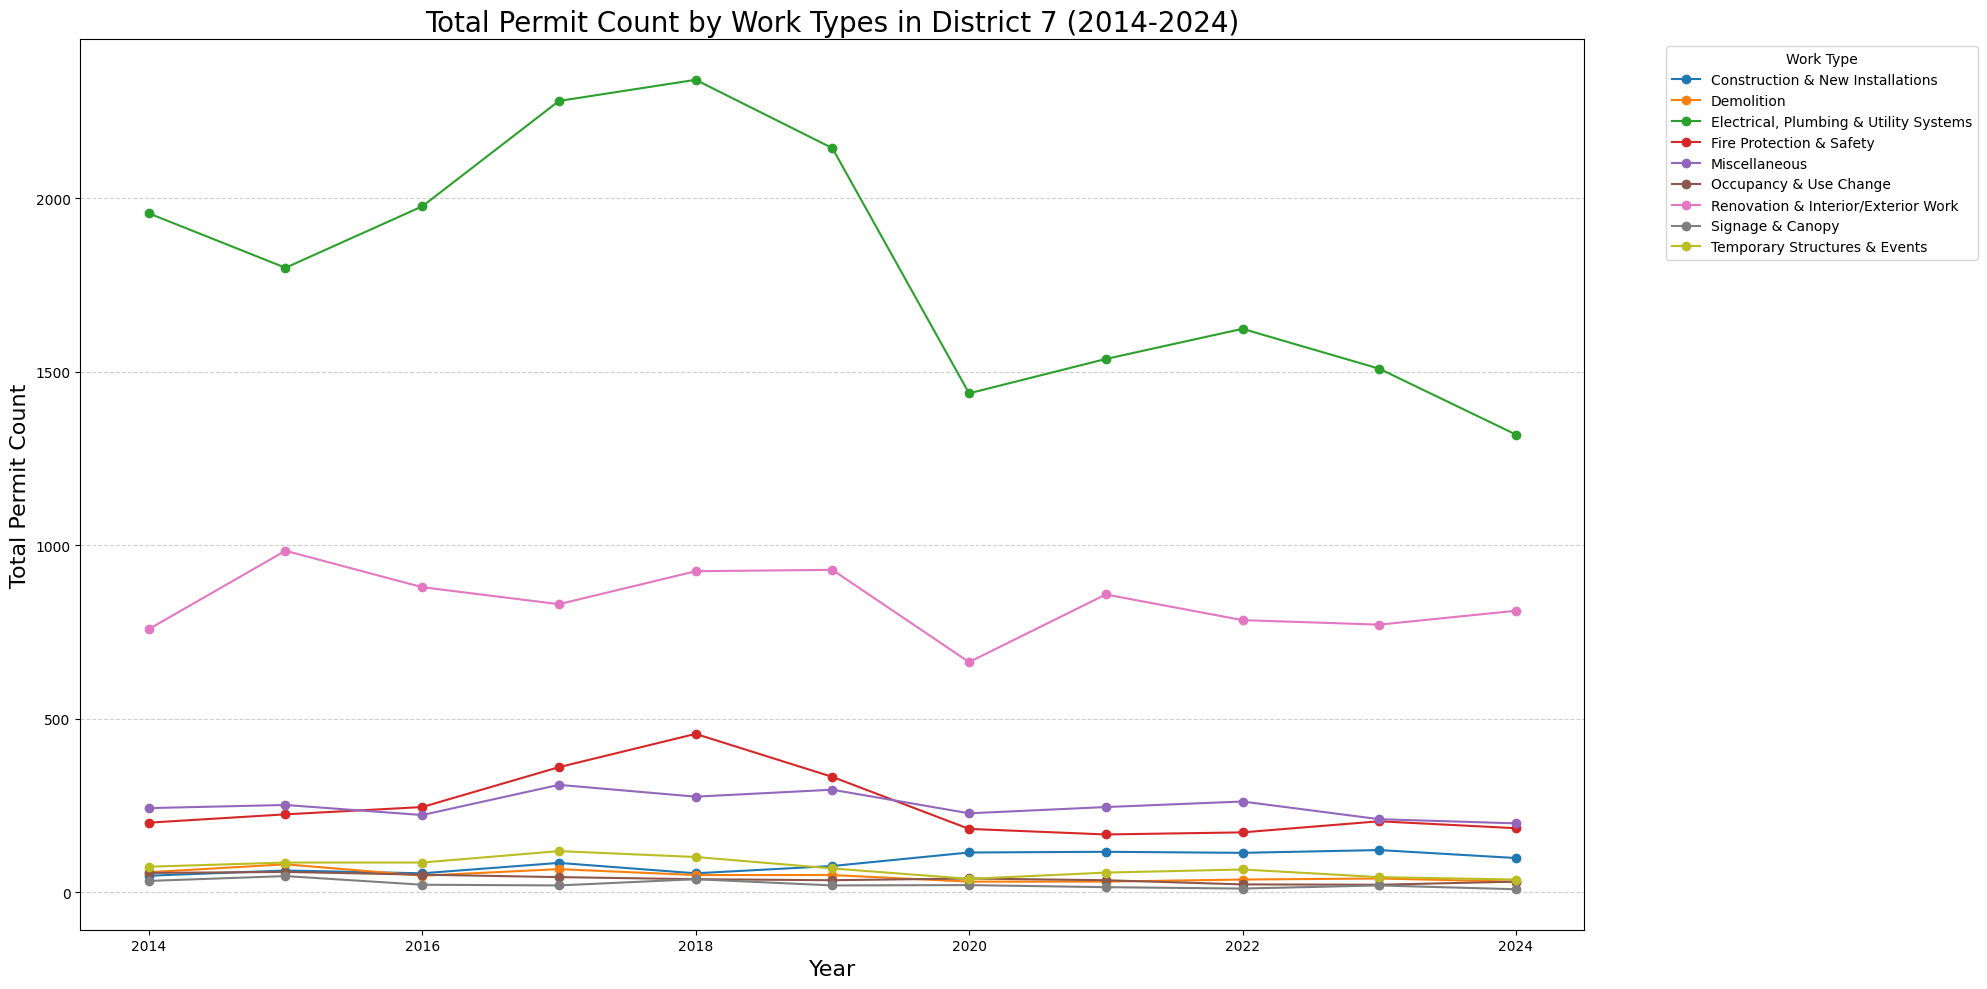

In [31]:
worktype_count_d7 = df_d7.groupby(['issued_year', 'worktype_group']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
worktype_count_d7.plot(kind='line', marker='o', linestyle='-', figsize=(20, 10))

plt.title('Total Permit Count by Work Types in District 7 (2014-2024)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Permit Count', fontsize=16)
plt.legend(title='Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Findings**
- Eletrical, Plumbing & Utility Systems and Renovation & Interior/Exterior Work are the most common work types in both Boston and District 7. 

#### Percentage of Permits by Grouped Work Types in Boston (2014-2024)

<Figure size 1400x700 with 0 Axes>

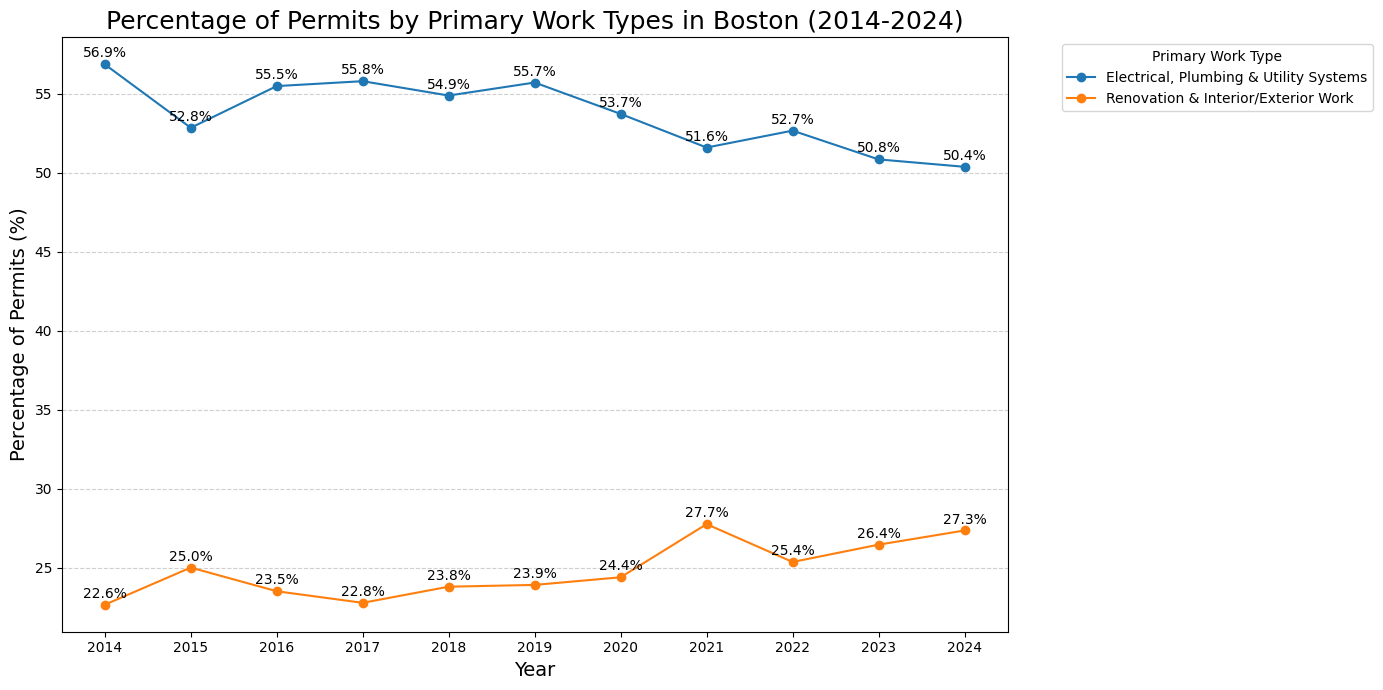

<Figure size 1400x700 with 0 Axes>

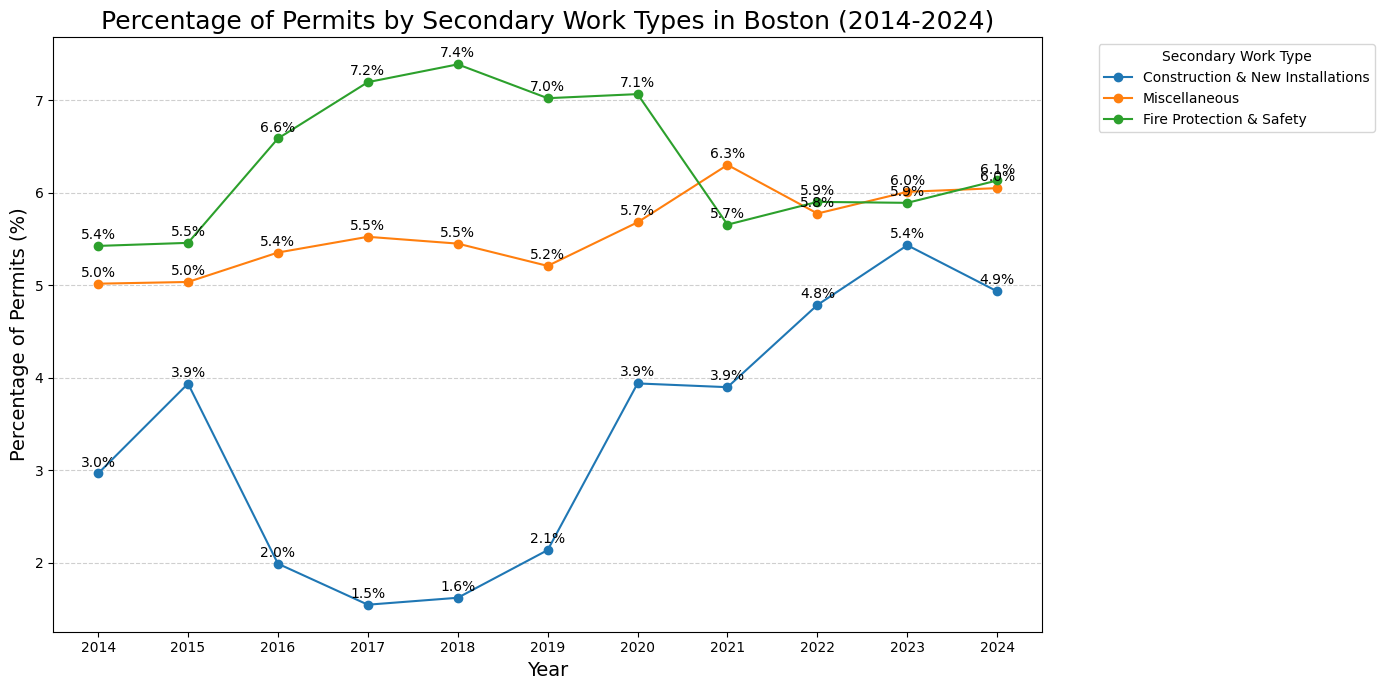

<Figure size 1400x700 with 0 Axes>

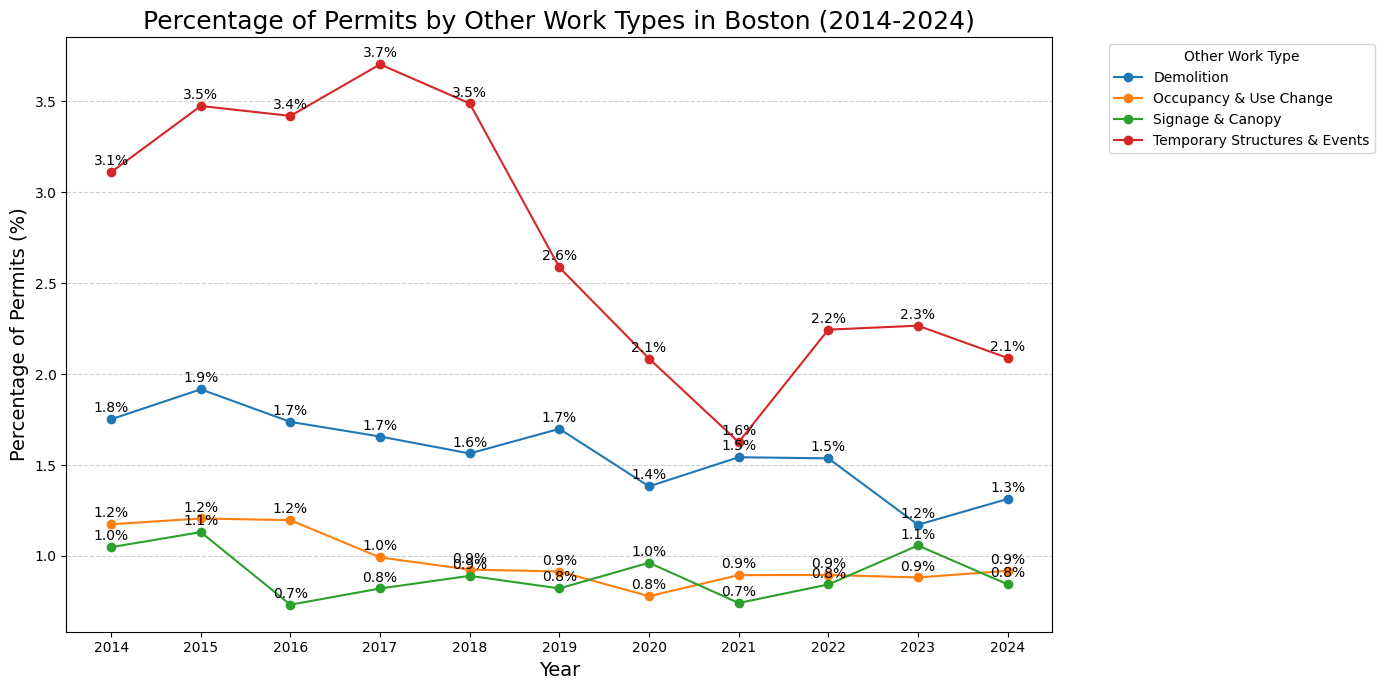

In [32]:
worktype_percent = worktype_count.div(worktype_count.sum(axis=1), axis=0) * 100

primary_worktype = ['Electrical, Plumbing & Utility Systems', 'Renovation & Interior/Exterior Work']
secondary_worktype = ['Construction & New Installations', 'Miscellaneous', 'Fire Protection & Safety']

primary_worktype_data = worktype_percent[primary_worktype]
secondary_worktype_data = worktype_percent[secondary_worktype]
other_worktype_data = worktype_percent.drop(columns=primary_worktype + secondary_worktype)

plt.figure(figsize=(14, 7))
ax1 = primary_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax1.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax1.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Primary Work Types in Boston (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=primary_worktype_data.index, labels=primary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Primary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax2 = secondary_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax2.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax2.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Secondary Work Types in Boston (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=secondary_worktype_data.index, labels=secondary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Secondary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax3 = other_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax3.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax3.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Other Work Types in Boston (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=other_worktype_data.index, labels=other_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Other Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Percentage of Permits by Grouped Work Types in District 7 (2014-2024)

<Figure size 1400x700 with 0 Axes>

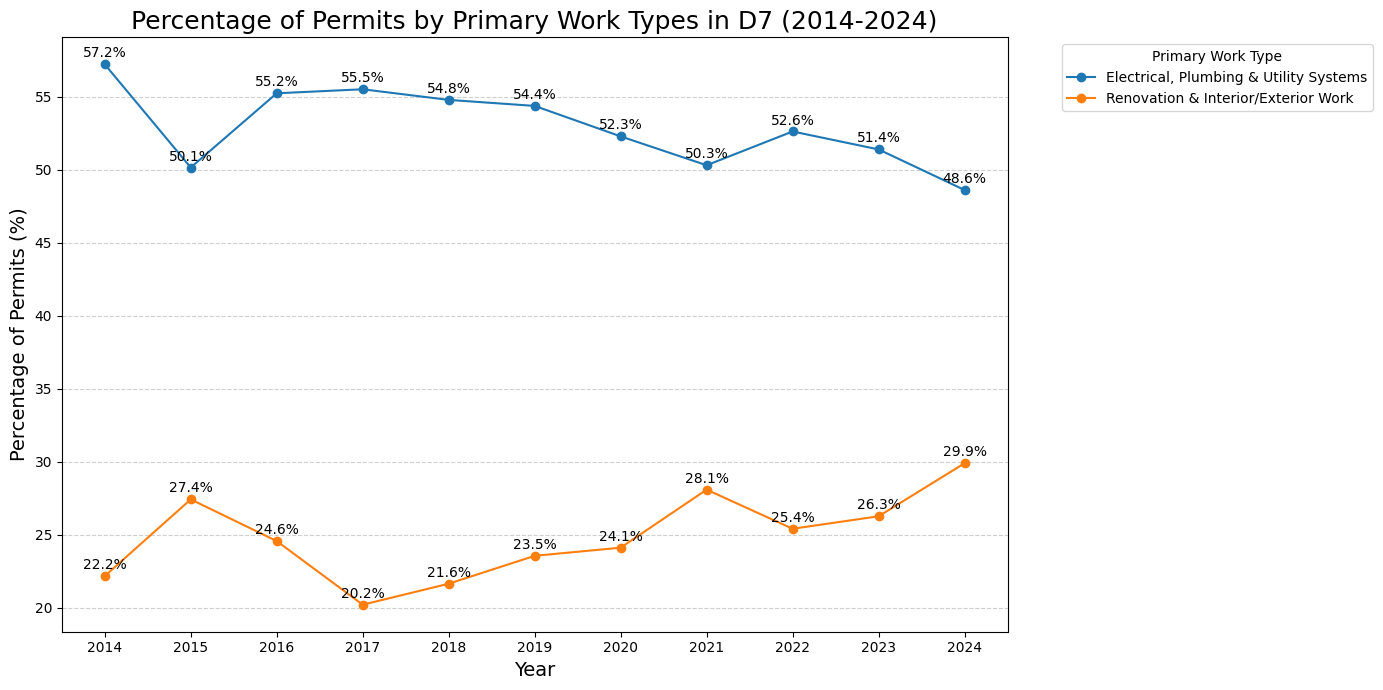

<Figure size 1400x700 with 0 Axes>

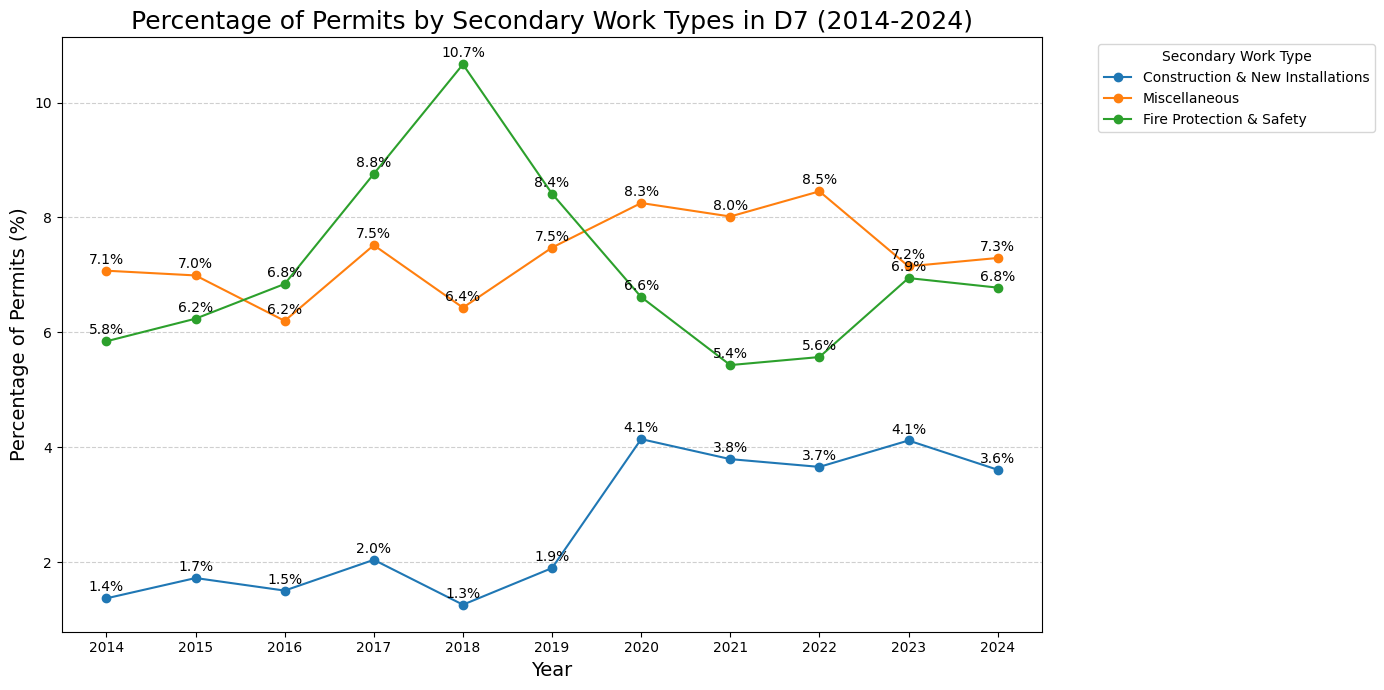

<Figure size 1400x700 with 0 Axes>

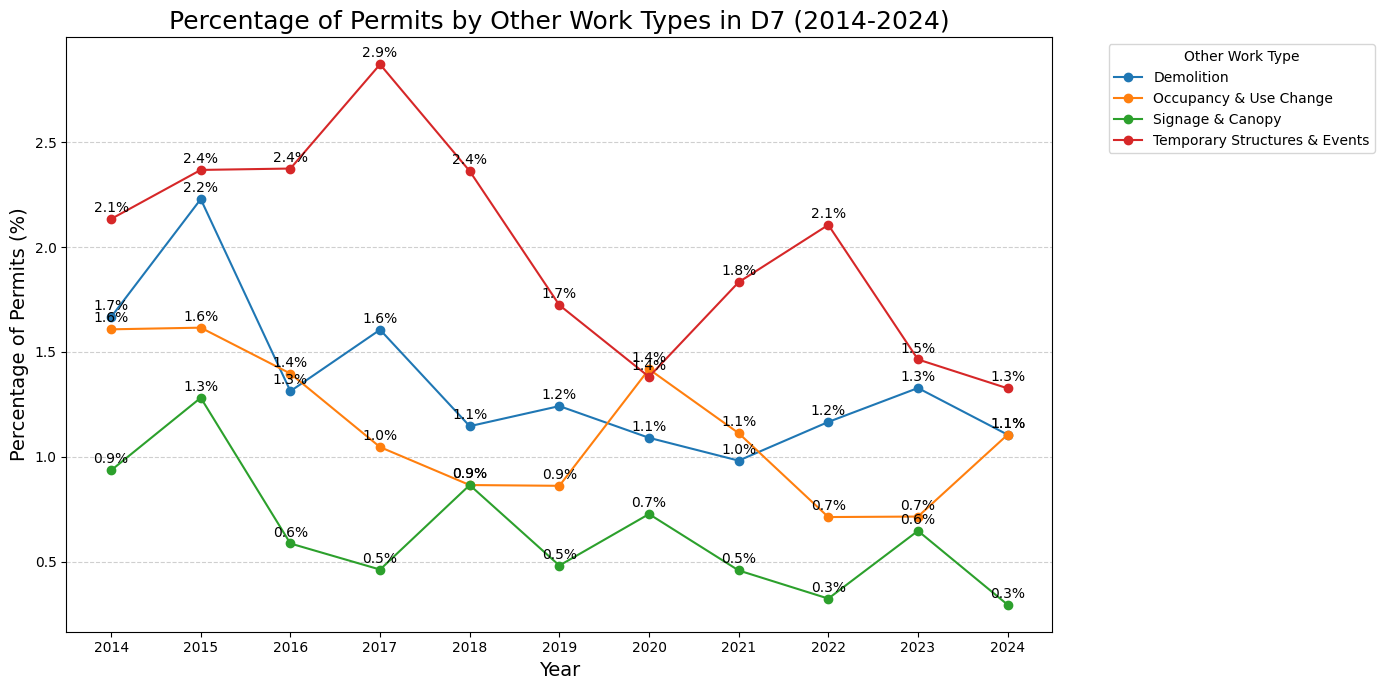

In [33]:
worktype_percent_d7 = worktype_count_d7.div(worktype_count_d7.sum(axis=1), axis=0) * 100

primary_worktype = ['Electrical, Plumbing & Utility Systems', 'Renovation & Interior/Exterior Work']
secondary_worktype = ['Construction & New Installations', 'Miscellaneous', 'Fire Protection & Safety']

primary_worktype_data = worktype_percent_d7[primary_worktype]
secondary_worktype_data = worktype_percent_d7[secondary_worktype]
other_worktype_data = worktype_percent_d7.drop(columns=primary_worktype + secondary_worktype)

plt.figure(figsize=(14, 7))
ax1 = primary_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax1.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax1.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Primary Work Types in D7 (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=primary_worktype_data.index, labels=primary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Primary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax2 = secondary_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax2.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax2.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Secondary Work Types in D7 (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=secondary_worktype_data.index, labels=secondary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Secondary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax3 = other_worktype_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax3.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax3.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Other Work Types in D7 (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=other_worktype_data.index, labels=other_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Other Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Finding**
- Electrical, Plumbing & Utility Systems and Renovation & Interior/Exterior Work are the work types that have the highest percentages in both Boston and District 7.
- Other work types appears to follow similar patterns with some fluctuations.

#### Total Permit Count by Occupancy Types in Boston (2014-2024)

<Figure size 2000x1000 with 0 Axes>

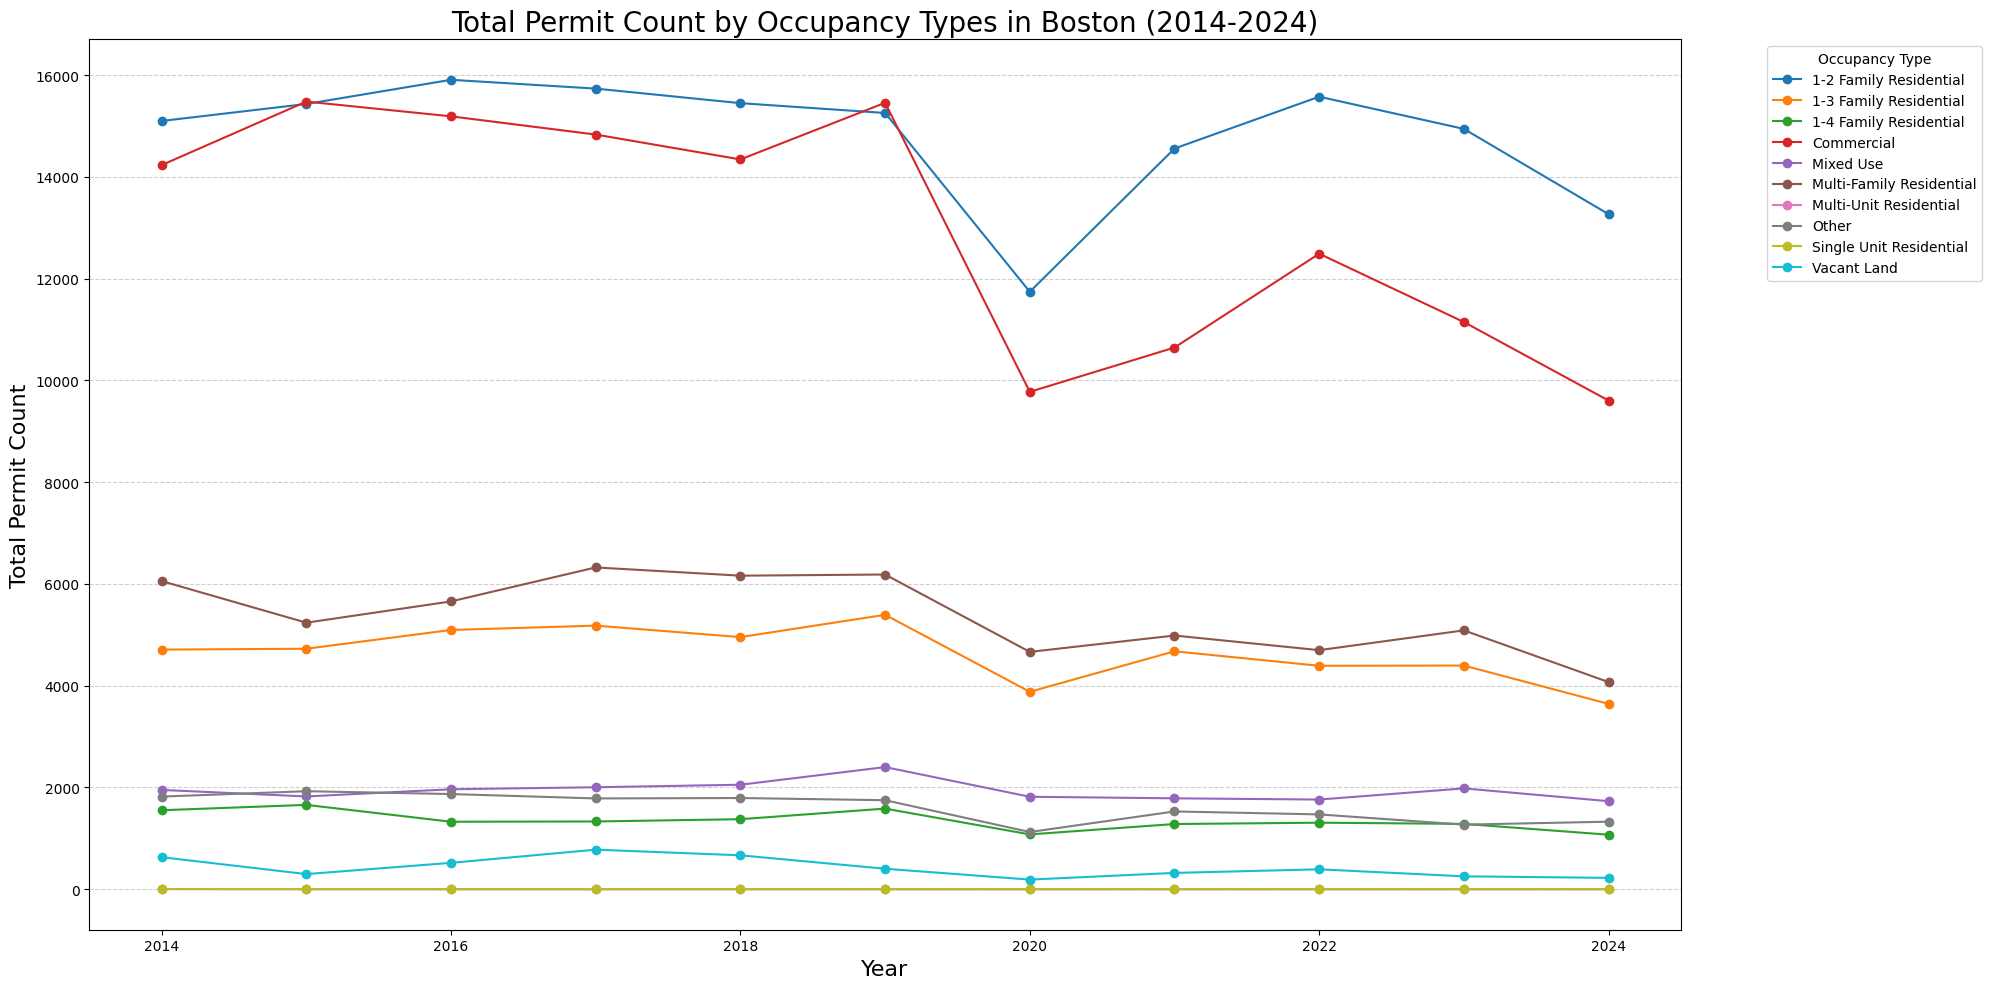

In [34]:
occupancytype_count = df.groupby(['issued_year', 'occupancytype_group']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
occupancytype_count.plot(kind='line', marker='o', linestyle='-', figsize=(20, 10))

plt.title('Total Permit Count by Occupancy Types in Boston (2014-2024)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Permit Count', fontsize=16)
plt.legend(title='Occupancy Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Total Permit Count by Occupancy Types in District 7 (2014-2024)

<Figure size 2000x1000 with 0 Axes>

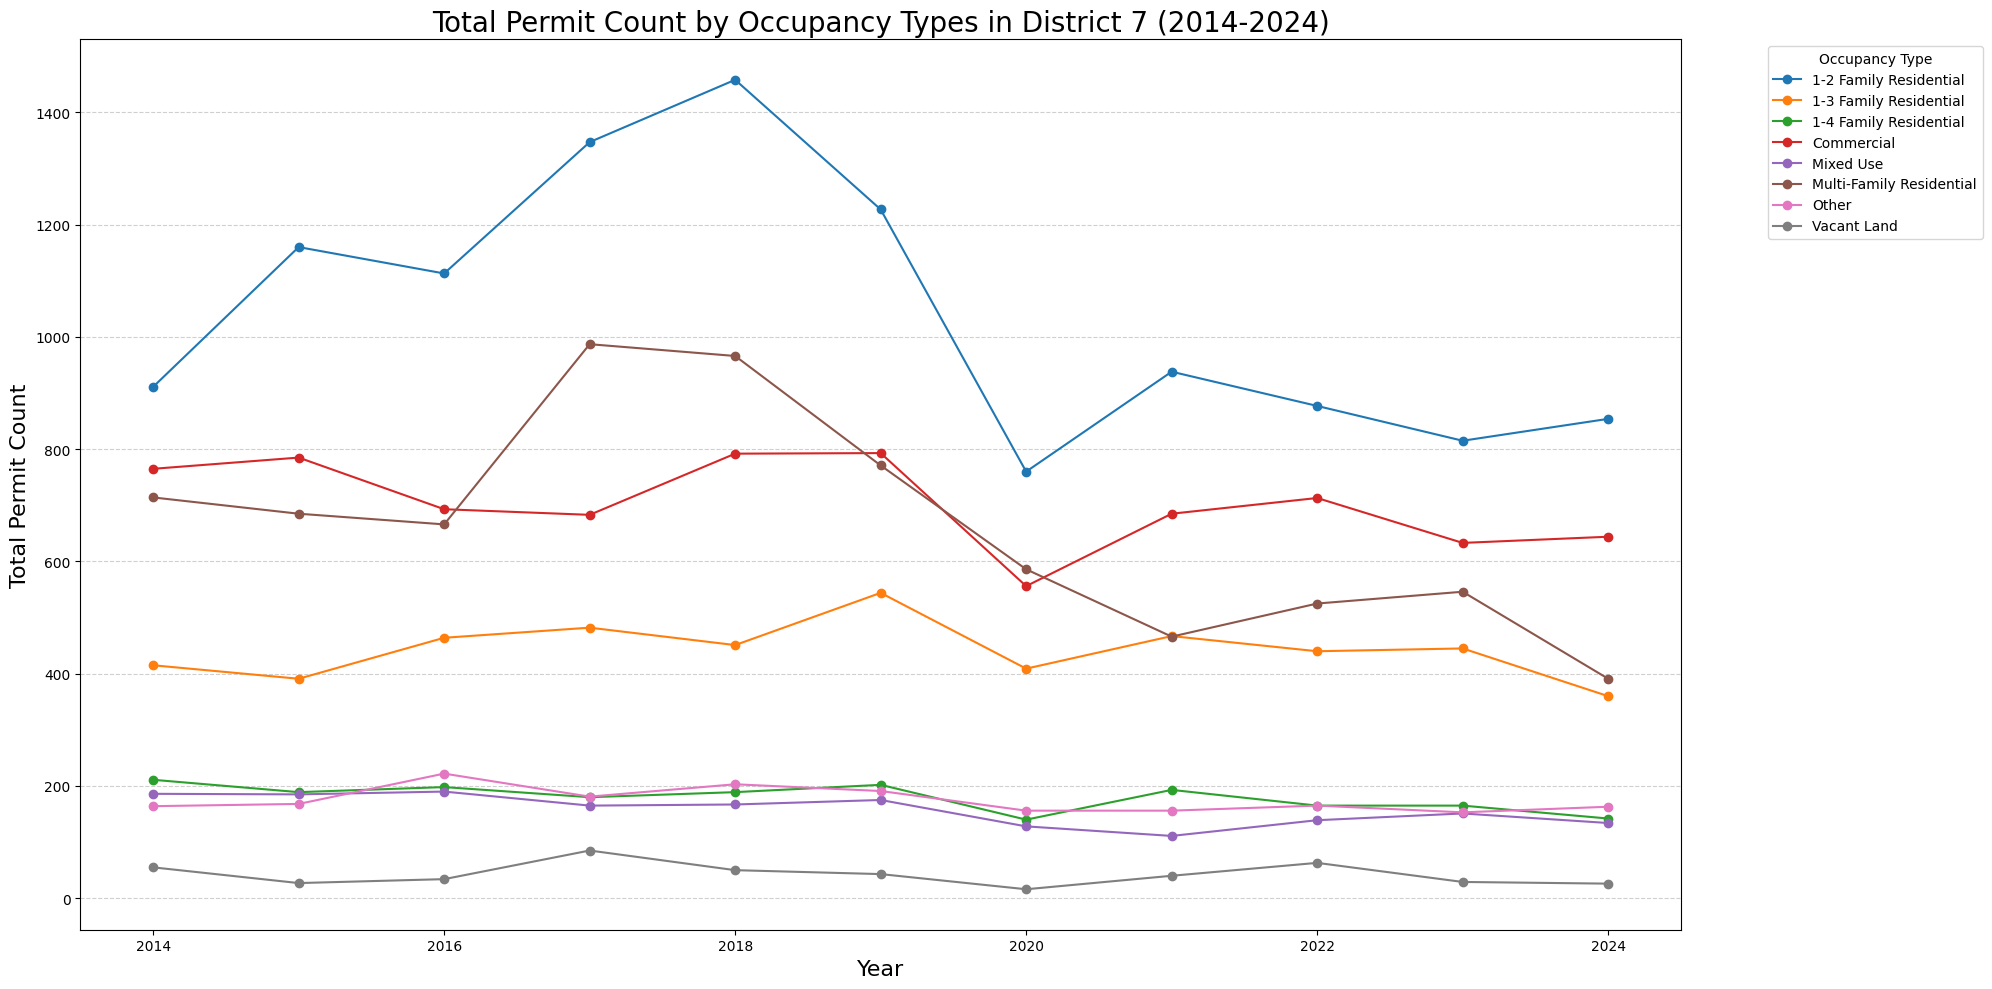

In [36]:
occupancytype_count_d7 = df_d7.groupby(['issued_year', 'occupancytype_group']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))
occupancytype_count_d7.plot(kind='line', marker='o', linestyle='-', figsize=(20, 10))

plt.title('Total Permit Count by Occupancy Types in District 7 (2014-2024)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Permit Count', fontsize=16)
plt.legend(title='Occupancy Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Finding**
- In Boston, 1-2 Family Residential and Commercial are the most common occupancy types. 
- In District 7, Family Residential, Commercial, and Multi-Family Residential are the most common occupancy types. 

#### Percentage of Permits by Grouped Occupancy Types in Boston (2014-2024)

<Figure size 1400x700 with 0 Axes>

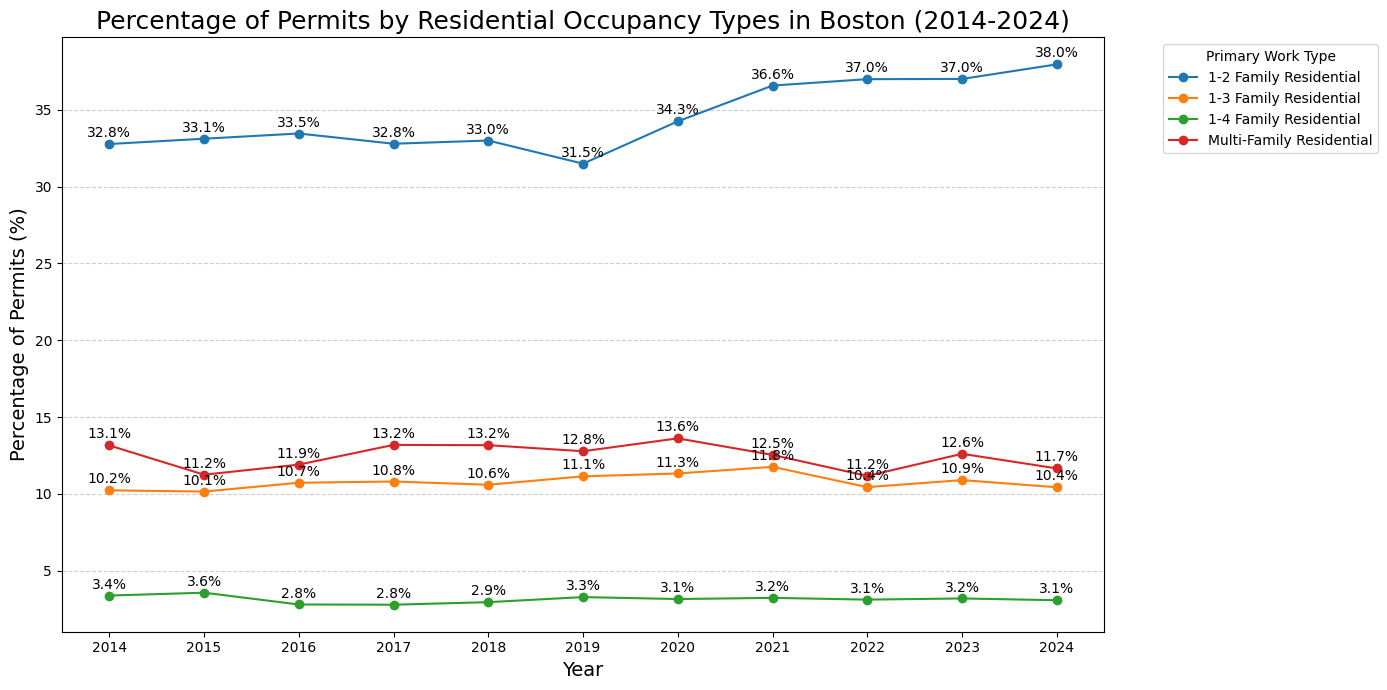

<Figure size 1400x700 with 0 Axes>

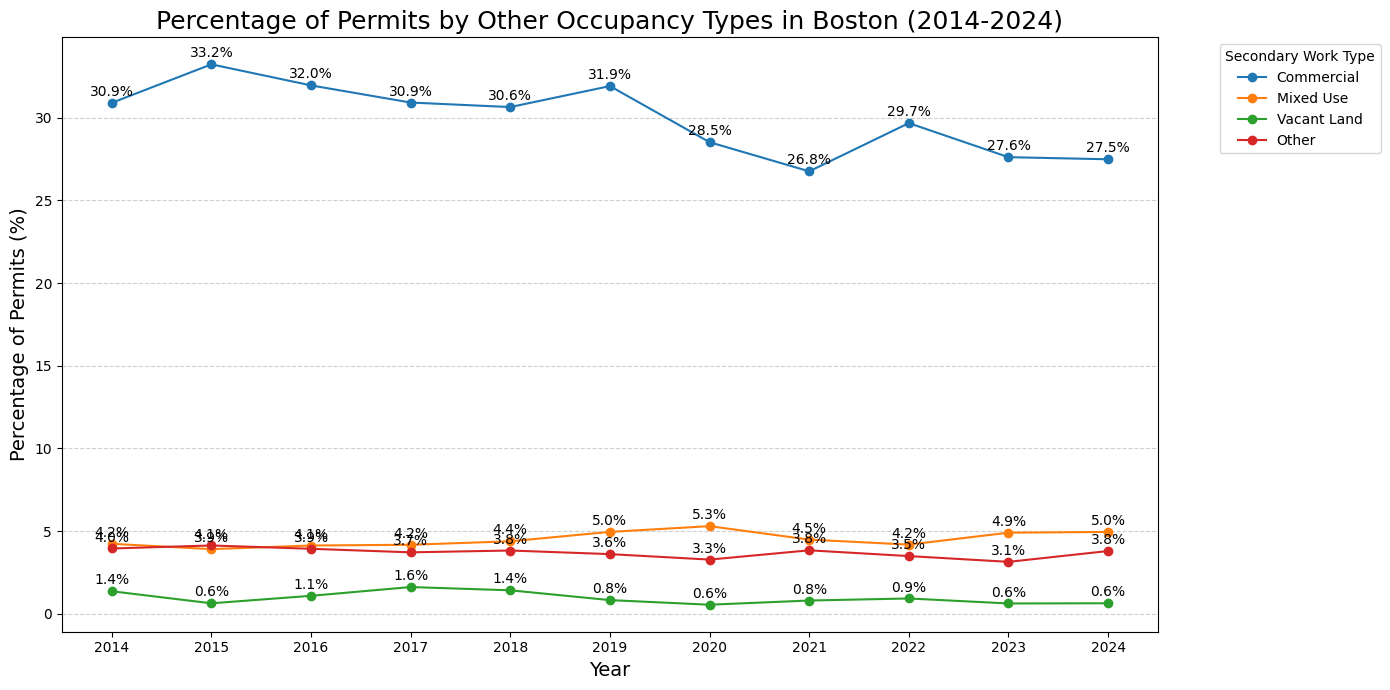

In [35]:
occupancytype_percent = occupancytype_count.div(occupancytype_count.sum(axis=1), axis=0) * 100

residential_occupnacy = ['1-2 Family Residential', '1-3 Family Residential', '1-4 Family Residential', 'Multi-Family Residential']
other_occupnacy = ['Commercial', 'Mixed Use', 'Vacant Land', 'Other']

primary_occupancy_data = occupancytype_percent[residential_occupnacy]
secondary_occupancy_data = occupancytype_percent[other_occupnacy]

plt.figure(figsize=(14, 7))
ax1 = primary_occupancy_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax1.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax1.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Residential Occupancy Types in Boston (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=primary_worktype_data.index, labels=primary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Primary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax2 = secondary_occupancy_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax2.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax2.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Other Occupancy Types in Boston (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=secondary_worktype_data.index, labels=secondary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Secondary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Percentage of Permits by Grouped Occupancy Types in District 7 (2014-2024)

<Figure size 1400x700 with 0 Axes>

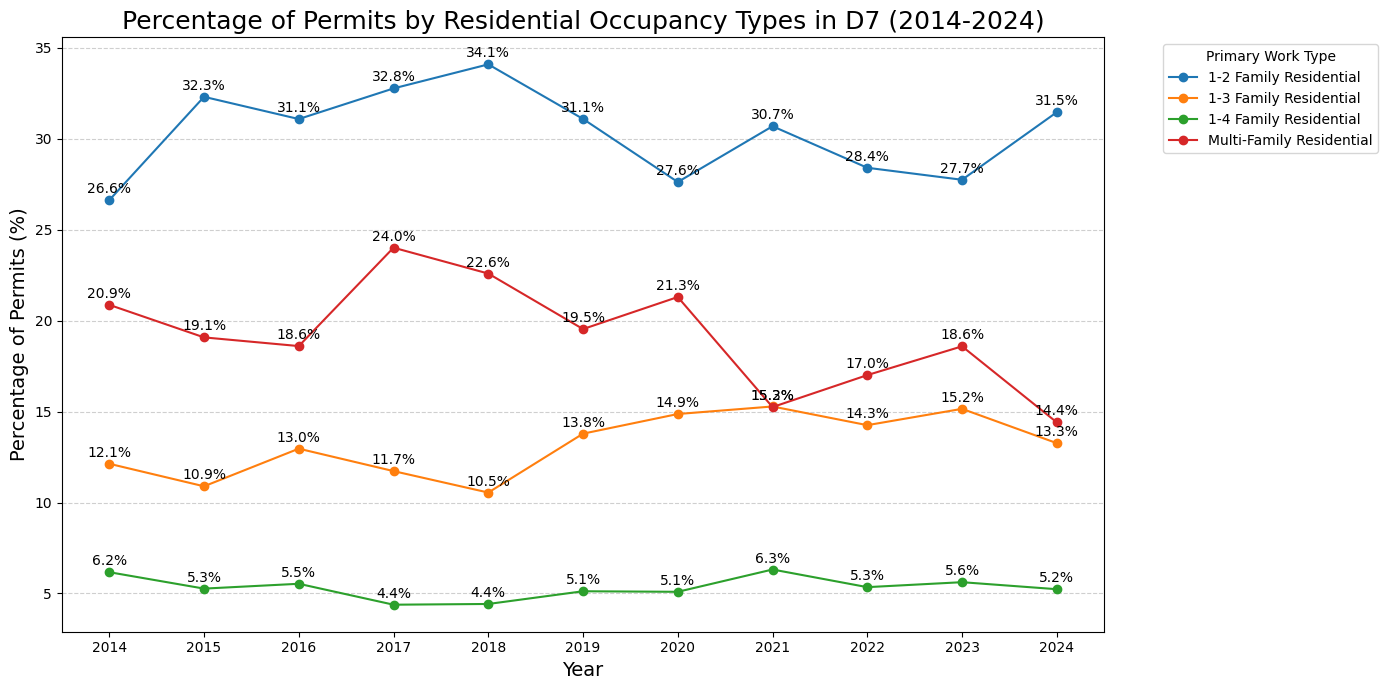

<Figure size 1400x700 with 0 Axes>

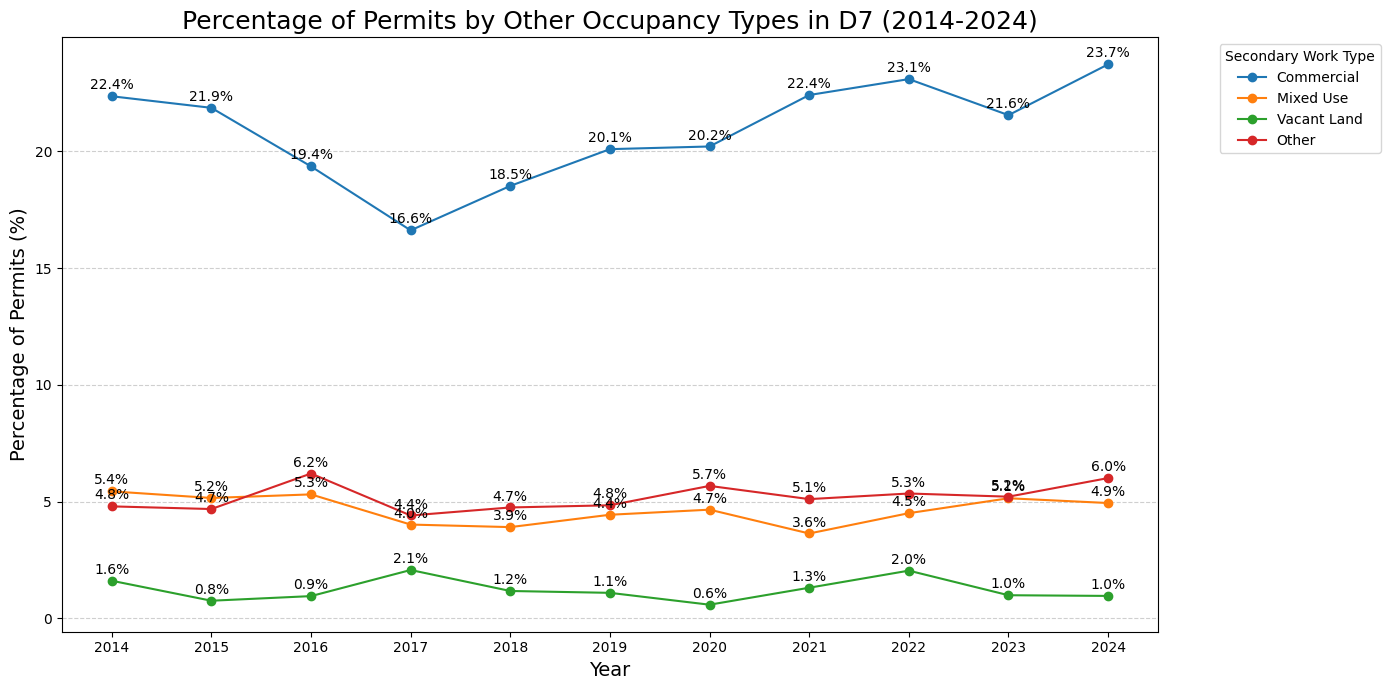

In [37]:
occupancytype_percent_d7 = occupancytype_count_d7.div(occupancytype_count_d7.sum(axis=1), axis=0) * 100

residential_occupnacy = ['1-2 Family Residential', '1-3 Family Residential', '1-4 Family Residential', 'Multi-Family Residential']
other_occupnacy = ['Commercial', 'Mixed Use', 'Vacant Land', 'Other']

primary_occupancy_data = occupancytype_percent_d7[residential_occupnacy]
secondary_occupancy_data = occupancytype_percent_d7[other_occupnacy]

plt.figure(figsize=(14, 7))
ax1 = primary_occupancy_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax1.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax1.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Residential Occupancy Types in D7 (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=primary_worktype_data.index, labels=primary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Primary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
ax2 = secondary_occupancy_data.plot(kind='line', marker='o', linestyle='-', figsize=(14, 7))

for line in ax2.get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        label = f"{y:.1f}%"
        ax2.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

plt.title('Percentage of Permits by Other Occupancy Types in D7 (2014-2024)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=secondary_worktype_data.index, labels=secondary_worktype_data.index.astype(int), rotation=0)
plt.legend(title='Secondary Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Finding**
- In Boston, the Residential Occupancy Types group is dominated by 1-2 Family Residential with an upward trend over the years. 
- In District 7, the Residential Occupancy Types group is more evenly distributed but still has more 1-2 Family Residential. 
- In Other Occupancy Types group, Commercial has the highest percentage in both Boston and District 7. 

#### Total Permit Count by Status in Boston (2014-2024)

<Figure size 1200x600 with 0 Axes>

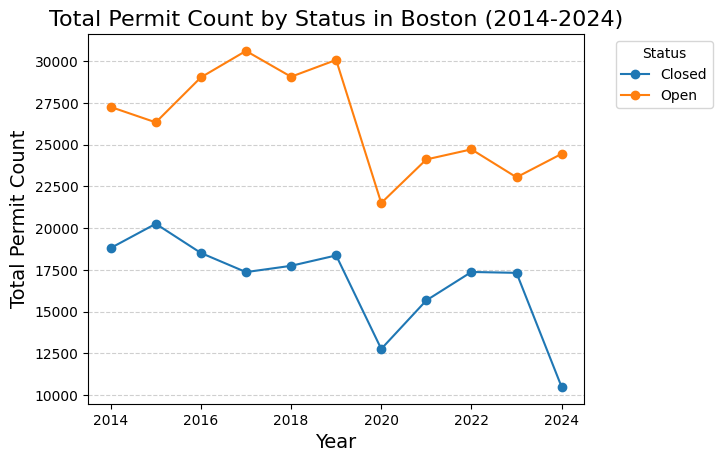

In [38]:
status_count = df.groupby(['issued_year', 'status']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
status_count.plot(kind='line', marker='o', linestyle='-')

plt.title('Total Permit Count by Status in Boston (2014-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Permit Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Total Permit Count by Status in District 7 (2014-2024)

<Figure size 1200x600 with 0 Axes>

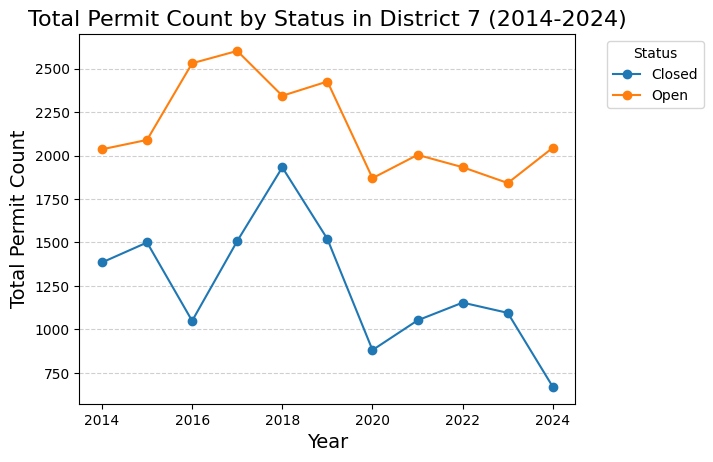

In [39]:
status_count_d7 = df_d7.groupby(['issued_year', 'status']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
status_count_d7.plot(kind='line', marker='o', linestyle='-')

plt.title('Total Permit Count by Status in District 7 (2014-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Permit Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Percentage of Permit by Status in Boston (2014-2024)

<Figure size 1200x600 with 0 Axes>

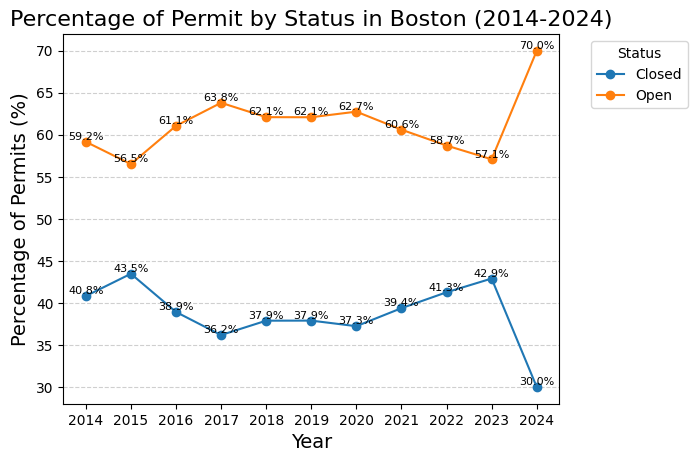

In [40]:
status_count = df.groupby(['issued_year', 'status']).size().unstack(fill_value=0)

status_percent = status_count.div(status_count.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
status_percent.plot(kind='line', marker='o', linestyle='-')

for year in status_percent.index:
    for status in status_percent.columns:
        plt.text(year, status_percent.loc[year, status], 
                 f"{status_percent.loc[year, status]:.1f}%", 
                 ha='center', va='bottom', fontsize=8)

plt.title('Percentage of Permit by Status in Boston (2014-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=status_percent.index, labels=status_percent.index.astype(int), rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


#### Percentage of Permit by Status in District 7 (2014-2024)

<Figure size 1200x600 with 0 Axes>

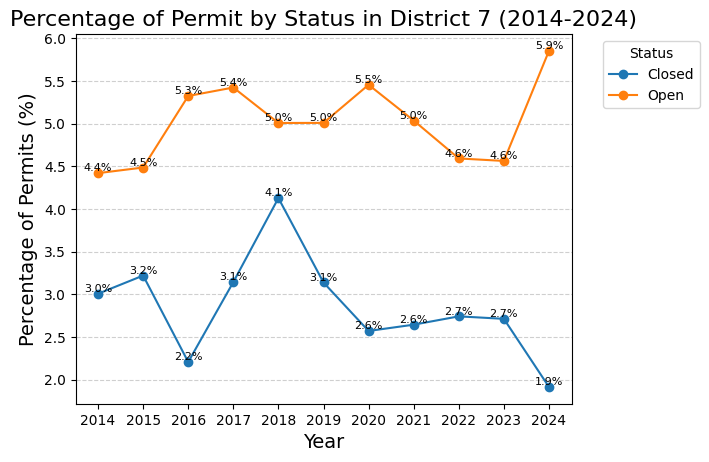

In [41]:
status_count_d7 = df_d7.groupby(['issued_year', 'status']).size().unstack(fill_value=0)

status_percent = status_count_d7.div(status_count.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
status_percent.plot(kind='line', marker='o', linestyle='-')

for year in status_percent.index:
    for status in status_percent.columns:
        plt.text(year, status_percent.loc[year, status], 
                 f"{status_percent.loc[year, status]:.1f}%", 
                 ha='center', va='bottom', fontsize=8)

plt.title('Percentage of Permit by Status in District 7 (2014-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Permits (%)', fontsize=14)
plt.xticks(ticks=status_percent.index, labels=status_percent.index.astype(int), rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Finding** 
- The percentages of permit status appear to follow similar trends in  both Boston and District 7. The significant difference between them is the percentage, meaning Boston has ~70% of open permits in 2024 while District 7 has ~6%. 

#### Total Permit Count by Neighborhood (2014-2024)

/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_9938/997137003.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=permit_count_by_city, x='City', y='Permit Count', palette='viridis')


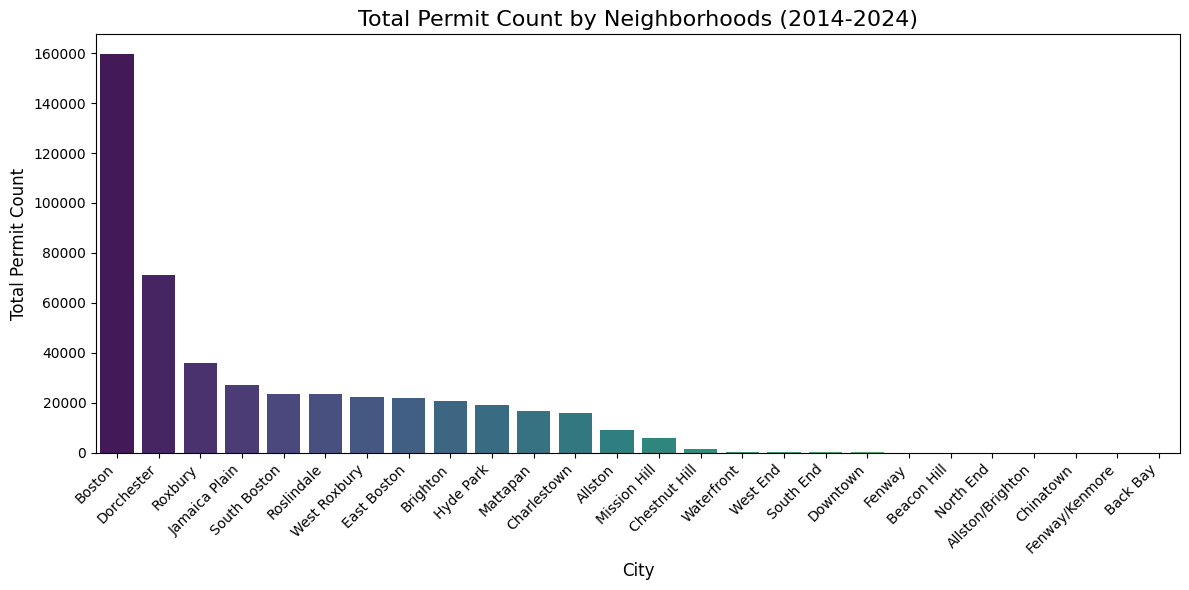

In [42]:
permit_count_by_city = df.groupby('city_name')['permitnumber'].count().reset_index()
permit_count_by_city = permit_count_by_city.sort_values(by='permitnumber', ascending=False)
permit_count_by_city.columns = ['City', 'Permit Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=permit_count_by_city, x='City', y='Permit Count', palette='viridis')

plt.title('Total Permit Count by Neighborhoods (2014-2024)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Permit Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Finding**
- Boston has the highest number of permit, followed by Dorchester and Roxury. 

#### Total Permit Valuation by Neighborhood (2014-2024)

/var/folders/5t/rl408cjx3wb2z3zq07qsqpnr0000gn/T/ipykernel_9938/1989198849.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=permit_value_by_city, x='City', y='Total Permit Value', palette='viridis')


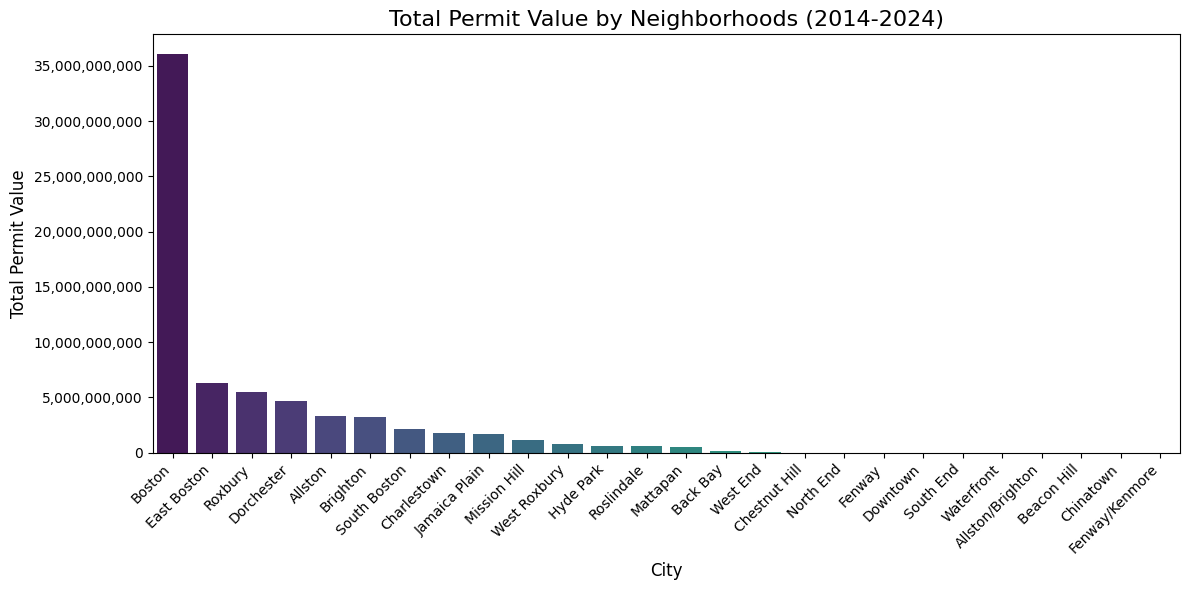

In [43]:
import matplotlib.ticker as ticker

permit_value_by_city = df.groupby('city_name')['declared_valuation'].sum().reset_index()
permit_value_by_city = permit_value_by_city.sort_values(by='declared_valuation', ascending=False)
permit_value_by_city.columns = ['City', 'Total Permit Value']

plt.figure(figsize=(12, 6))
sns.barplot(data=permit_value_by_city, x='City', y='Total Permit Value', palette='viridis')

plt.title('Total Permit Value by Neighborhoods (2014-2024)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Permit Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()


**Finding** 
- Similar to the number of permits, Boston has the highest permit valuation. 
- East Boston, Roxbury, and Dorchester also have a permit valuation around $5,000,000,000 for the past 10 years. 

## Key Insights

- Electrical, Plumbing & Utility Systems and Renovation & Interior/Exterior Work are the work types that have the highest percentages in both Boston and District 7. Other work types appears to follow similar patterns with some fluctuations.
- The 1-2 Family Residential is the occupancy type has the highest percentage in both Boston and District 7. Commercial also has considerable proportions in both areas.
- The permit status appear to follow similar trends in  both Boston and District 7. The significant difference between them is the percentage - Boston has ~70% of open permits in 2024 while District 7 has ~6%. 
- Boston, Roxbury, and Dorchester are the neighborhoods that have the highest number and declared valuation of permits. 